In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

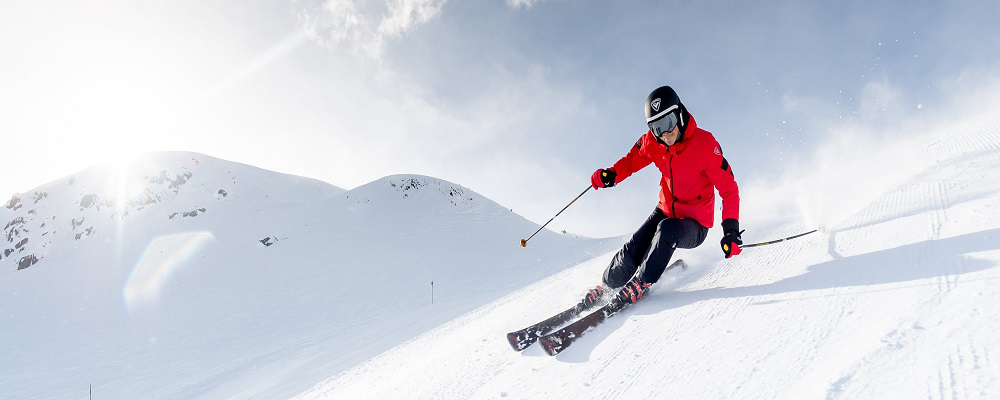

In [3]:
from PIL import Image
img =Image.open("img/ski_two.jpg")
img

### **Loading my data**

In [4]:
snow = pd.read_csv("original_data/snow.csv")
resorts = pd.read_csv("original_data/resorts.csv")
data_dict = pd.read_csv("original_data/data_dictionary.csv")

## **Getting to know my data**

### **Feature engineering & Cleaning**

In [5]:
print(f"Snow data shape: {snow.shape}")
print(f"Resorts data shape{resorts.shape}")

Snow data shape: (820522, 4)
Resorts data shape(499, 25)


In [6]:
snow.sample(n=2,random_state=42)

,Month,Latitude,Longitude,Snow
787074,2022-01-01,49.375,16.125,66.54
710427,2022-02-01,43.125,-121.625,94.88


In [7]:
snow.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820522 entries, 0 to 820521
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Month      820522 non-null  object 
 1   Latitude   820522 non-null  float64
 2   Longitude  820522 non-null  float64
 3   Snow       820522 non-null  float64
dtypes: float64(3), object(1)
memory usage: 71.2 MB


In [8]:
h  = "2022-01-01"

h.split('-')[1]

'01'

In [9]:
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
# https://pandas.pydata.org/docs/user_guide/timeseries.html

snow["month"] = pd.to_datetime(snow["Month"], format="%Y-%m-%d").dt.month 

snow.drop(columns=["Month"],inplace=True)

snow.rename(columns=str.lower, inplace=True)

new_order = ["month","latitude","longitude","snow"]

snow = snow[new_order]

In [10]:
snow.sample(n=5,random_state=42)

,month,latitude,longitude,snow
787074,1,49.375,16.125,66.54
710427,2,43.125,-121.625,94.88
528923,3,68.125,-89.375,100.00
302879,6,79.875,-44.125,100.00
773003,1,53.875,46.375,100.00


In [11]:
snow.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820522 entries, 0 to 820521
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   month      820522 non-null  int64  
 1   latitude   820522 non-null  float64
 2   longitude  820522 non-null  float64
 3   snow       820522 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 25.0 MB


In [12]:
resorts.columns

Index(['ID', 'Resort', 'Latitude', 'Longitude', 'Country', 'Continent',
       'Price', 'Season', 'Highest point', 'Lowest point', 'Beginner slopes',
       'Intermediate slopes', 'Difficult slopes', 'Total slopes',
       'Longest run', 'Snow cannons', 'Surface lifts', 'Chair lifts',
       'Gondola lifts', 'Total lifts', 'Lift capacity', 'Child friendly',
       'Snowparks', 'Nightskiing', 'Summer skiing'],
      dtype='object')

In [13]:
# https://www.statology.org/pandas-rename-columns/
resorts.drop(columns=["ID"],inplace=True)
resorts.columns = resorts.columns.str.replace(" ","_").str.lower()

In [14]:
# resorts.iloc[:,:5].sample(n=5, random_state=42)

Cross-checking all columns have been altered 

In [15]:
snow.columns

Index(['month', 'latitude', 'longitude', 'snow'], dtype='object')

In [16]:
resorts.columns

Index(['resort', 'latitude', 'longitude', 'country', 'continent', 'price',
       'season', 'highest_point', 'lowest_point', 'beginner_slopes',
       'intermediate_slopes', 'difficult_slopes', 'total_slopes',
       'longest_run', 'snow_cannons', 'surface_lifts', 'chair_lifts',
       'gondola_lifts', 'total_lifts', 'lift_capacity', 'child_friendly',
       'snowparks', 'nightskiing', 'summer_skiing'],
      dtype='object')

### **Memory management**

In [17]:
snow.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820522 entries, 0 to 820521
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   month      820522 non-null  int64  
 1   latitude   820522 non-null  float64
 2   longitude  820522 non-null  float64
 3   snow       820522 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 25.0 MB


In [18]:
resorts.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   resort               499 non-null    object 
 1   latitude             499 non-null    float64
 2   longitude            499 non-null    float64
 3   country              499 non-null    object 
 4   continent            499 non-null    object 
 5   price                499 non-null    int64  
 6   season               499 non-null    object 
 7   highest_point        499 non-null    int64  
 8   lowest_point         499 non-null    int64  
 9   beginner_slopes      499 non-null    int64  
 10  intermediate_slopes  499 non-null    int64  
 11  difficult_slopes     499 non-null    int64  
 12  total_slopes         499 non-null    int64  
 13  longest_run          499 non-null    int64  
 14  snow_cannons         499 non-null    int64  
 15  surface_lifts        499 non-null    int


| Data-Type | Precision |
| ----------- | ----------- |
float16   | 3
float32   | 6
float64   | 15
float128  | 18

--------------------------------- 


|Data type |min|max|
| ----------- | ----------- |----------- |
|int8|-128|127|
|int16|-32768|32767|
|int32|-2147483648|2147483647|
|int64|-9223372036854775808|9223372036854775807|

In [19]:
resorts.longitude[:2] 
# should be float32 precision instead of float64 precision

0    8.383487
1    8.206372
Name: longitude, dtype: float64

In [20]:
resorts.select_dtypes(include="O")[:2] 
# Use get_dummies on the booleans columns if needed

,resort,country,continent,season,child_friendly,snowparks,nightskiing,summer_skiing
0,Hemsedal,Norway,Europe,November - May,Yes,Yes,Yes,No
1,Geilosiden Geilo,Norway,Europe,November - April,Yes,Yes,Yes,No


In [21]:
for column in resorts.loc[:,['child_friendly','snowparks', 'nightskiing', 'summer_skiing']]:
    resorts[str(column)].replace(["Yes","No"],["yes","no"],inplace=True)
    # data type is a string 

In [22]:
# Memory management
def memory_magment(df):
    for col in df.columns:
        col_type = df[col].dtype


        if col_type != np.object:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8) # int 8
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16) # int 16
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)  # in 32
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64) # int 64 
            # This part of the code was commented out due to the columns 
            # of the datasets being related to postions of longitude and latitude
            # else:
            #     if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
            #         df[col] = df[col].astype(np.float16)
            #     elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
            #         df[col] = df[col].astype(np.float32)
            #     else: 
            #         df[col] = df[col].astype(np.float64)
        else:
            # Convertinf objects to category to save up memory
            df[col] = df[col].astype('category')   
    return df


df_memory_snow = snow.copy()
df_memory_snow = memory_magment(df_memory_snow)    

df_memory_resorts = resorts.copy()
df_memory_resorts = memory_magment(df_memory_resorts)    

In [23]:
print(resorts.longitude[:1])
print("")
print(df_memory_resorts.longitude[:1])

0    8.383487
Name: longitude, dtype: float64

0    8.383487
Name: longitude, dtype: float64


In [24]:
# (df_memory_resorts.select_dtypes(include="category").info(memory_usage="deep"))
(df_memory_resorts.info(memory_usage="deep"))
# memory usage dropped from 316.4 KB 89.2 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   resort               499 non-null    category
 1   latitude             499 non-null    float64 
 2   longitude            499 non-null    float64 
 3   country              499 non-null    category
 4   continent            499 non-null    category
 5   price                499 non-null    int16   
 6   season               499 non-null    category
 7   highest_point        499 non-null    int16   
 8   lowest_point         499 non-null    int16   
 9   beginner_slopes      499 non-null    int16   
 10  intermediate_slopes  499 non-null    int16   
 11  difficult_slopes     499 non-null    int8    
 12  total_slopes         499 non-null    int16   
 13  longest_run          499 non-null    int8    
 14  snow_cannons         499 non-null    int16   
 15  surface_lifts        49

In [25]:
df_memory_snow.info(memory_usage="deep")
# memory usage dropped from 25.0 MB to 19.6 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820522 entries, 0 to 820521
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   month      820522 non-null  int8   
 1   latitude   820522 non-null  float64
 2   longitude  820522 non-null  float64
 3   snow       820522 non-null  float64
dtypes: float64(3), int8(1)
memory usage: 19.6 MB


snow
- memory usage dropped from 25.0 MB to 19.6 MB

resorts
- memory usage dropped from 316.4 KB 89.2 KB

In [26]:
df_memory_resorts.select_dtypes("category").nunique()

resort            499
country            38
continent           5
season             31
child_friendly      2
snowparks           2
nightskiing         2
summer_skiing       2
dtype: int64

In [27]:
for column in df_memory_resorts.select_dtypes("category"):
    print(f"This are the values in the: {column} \n{df_memory_resorts[column].unique()}")

    print(f"This is the total values present :{df_memory_resorts[column].nunique()}\n")

This are the values in the: resort 
['Hemsedal', 'Geilosiden Geilo', 'Golm', 'Red Mountain Resort-Rossland', 'Hafjell', ..., 'Puigmal', 'Kranzberg-Mittenwald', 'Wetterstein lifts-Wettersteinbahnen-� Ehrwald', 'Stuhleck-Spital am Semmering', 'Le Massif']
Length: 499
Categories (499, object): ['Hemsedal', 'Geilosiden Geilo', 'Golm', 'Red Mountain Resort-Rossland', ..., 'Kranzberg-Mittenwald', 'Wetterstein lifts-Wettersteinbahnen-� Ehrwald', 'Stuhleck-Spital am Semmering', 'Le Massif']
This is the total values present :499

This are the values in the: country 
['Norway', 'Austria', 'Canada', 'New Zealand', 'Chile', ..., 'Greece', 'Liechtenstein', 'Lithuania', 'Kazakhstan', 'China']
Length: 38
Categories (38, object): ['Norway', 'Austria', 'Canada', 'New Zealand', ..., 'Liechtenstein', 'Lithuania', 'Kazakhstan', 'China']
This is the total values present :38

This are the values in the: continent 
['Europe', 'North America', 'Oceania', 'South America', 'Asia']
Categories (5, object): ['Euro

In [28]:
df_memory_resorts.columns

Index(['resort', 'latitude', 'longitude', 'country', 'continent', 'price',
       'season', 'highest_point', 'lowest_point', 'beginner_slopes',
       'intermediate_slopes', 'difficult_slopes', 'total_slopes',
       'longest_run', 'snow_cannons', 'surface_lifts', 'chair_lifts',
       'gondola_lifts', 'total_lifts', 'lift_capacity', 'child_friendly',
       'snowparks', 'nightskiing', 'summer_skiing'],
      dtype='object')

**Checking for null values**

In [29]:
df_memory_resorts.duplicated().sum() # no duplicates values

0

In [30]:
df_memory_resorts.isna().sum() # no null values

resort                 0
latitude               0
longitude              0
country                0
continent              0
price                  0
season                 0
highest_point          0
lowest_point           0
beginner_slopes        0
intermediate_slopes    0
difficult_slopes       0
total_slopes           0
longest_run            0
snow_cannons           0
surface_lifts          0
chair_lifts            0
gondola_lifts          0
total_lifts            0
lift_capacity          0
child_friendly         0
snowparks              0
nightskiing            0
summer_skiing          0
dtype: int64

In [31]:
df_memory_snow.duplicated().sum() # no duplicates values

0

In [32]:
df_memory_snow.isna().sum() # no null values

month        0
latitude     0
longitude    0
snow         0
dtype: int64

In [33]:
df_memory_resorts.describe()

,latitude,longitude,price,highest_point,lowest_point,beginner_slopes,intermediate_slopes,difficult_slopes,total_slopes,longest_run,snow_cannons,surface_lifts,chair_lifts,gondola_lifts,total_lifts,lift_capacity
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,43.205684,-6.006784,48.721443,2160.589178,1200.631263,31.819639,37.921844,16.164329,85.905812,3.545090,179.136273,11.282565,9.721443,3.258517,24.262525,31650.961924
std,15.975790,59.990459,21.718733,774.339805,596.142294,47.401764,44.358524,20.115855,100.874157,3.947887,372.321111,13.365360,11.461502,5.867967,27.672736,40781.986019
min,-45.054960,-149.740657,0.000000,163.000000,36.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.672650,1.380975,36.000000,1594.000000,800.000000,10.000000,12.000000,3.000000,30.000000,0.000000,0.000000,3.000000,3.000000,0.000000,10.000000,11645.000000
50%,46.347316,8.206372,45.000000,2175.000000,1121.000000,18.000000,25.000000,9.000000,55.000000,3.000000,15.000000,7.000000,6.000000,1.000000,15.000000,18510.000000
75%,47.327089,12.429237,54.000000,2700.000000,1500.000000,30.000000,45.000000,21.000000,100.000000,6.000000,180.000000,14.000000,11.500000,4.000000,26.000000,32829.000000
max,67.784406,176.876668,141.000000,3914.000000,3286.000000,312.000000,239.000000,126.000000,600.000000,16.000000,2383.000000,89.000000,74.000000,40.000000,174.000000,252280.000000


In [34]:
df_memory_resorts.describe(include="category")

,resort,country,continent,season,child_friendly,snowparks,nightskiing,summer_skiing
count,499,499,499,499,499,499,499,499
unique,499,38,5,31,2,2,2,2
top,49 Degrees North Mountain Resort,Austria,Europe,December - April,yes,yes,no,no
freq,1,89,360,220,495,378,295,470


**Observations**
- Highest price is 141
- Lowest price is 0
- Mean price is 49
- Deviation from mean is 22
- Austria appears mostly in country
- December - April appears mostly in continent
- yes appears mostly in child_friendly
- yes appears mostly in snowparks
- no appears mostly in nightskiing
- no appears mostly in summer_skiing

Proceed with EDA(Exploratory Data Analysis)

## **Exploratory data analysis (EDA)**

In [35]:
analysis_snow = df_memory_snow.copy()
analysis_resorts = df_memory_resorts.copy()

In [36]:
analysis_resorts.head(n=2)

,resort,latitude,longitude,country,continent,price,season,highest_point,lowest_point,beginner_slopes,...,snow_cannons,surface_lifts,chair_lifts,gondola_lifts,total_lifts,lift_capacity,child_friendly,snowparks,nightskiing,summer_skiing
0,Hemsedal,60.928244,8.383487,Norway,Europe,46,November - May,1450,620,29,...,325,15,6,0,21,22921,yes,yes,yes,no
1,Geilosiden Geilo,60.534526,8.206372,Norway,Europe,44,November - April,1178,800,18,...,100,18,6,0,24,14225,yes,yes,yes,no


**Snow analysis**

In [37]:
analysis_snow.head(n=2)

,month,latitude,longitude,snow
0,12,63.125,68.875,95.28
1,12,63.125,69.125,100.00


**Levels of skewness**
1. (-0.5,0.5) = lowly skewed
2. (-1,-0.5) U (0.5,1) = Moderately skewed
3. (-1 & beyond ) U (1 & beyond) = Highly skewed

In [38]:
snow_bar = analysis_snow.groupby("month")["snow"].agg([("total_snow","sum"),("average_snow","mean"),("std_snow","std"),("skew_snow","skew")]).reset_index()

In [39]:
snow_bar

,month,total_snow,average_snow,std_snow,skew_snow
0,1,7.781931e+06,83.078158,32.906706,-1.664095
1,2,9.887669e+06,87.278277,29.542419,-2.124705
2,3,9.596029e+06,87.310444,29.590235,-2.133760
3,4,7.882505e+06,81.801819,34.129321,-1.518723
4,5,5.212025e+06,70.487065,36.584689,-0.745826
5,6,2.013106e+06,60.281671,42.093139,-0.331580
6,7,1.261243e+06,58.407096,44.625275,-0.266268
7,8,1.194829e+06,60.889212,44.535598,-0.387167
8,9,1.883592e+06,52.884629,41.499695,0.006219
9,10,4.803362e+06,72.685709,37.331693,-0.882914


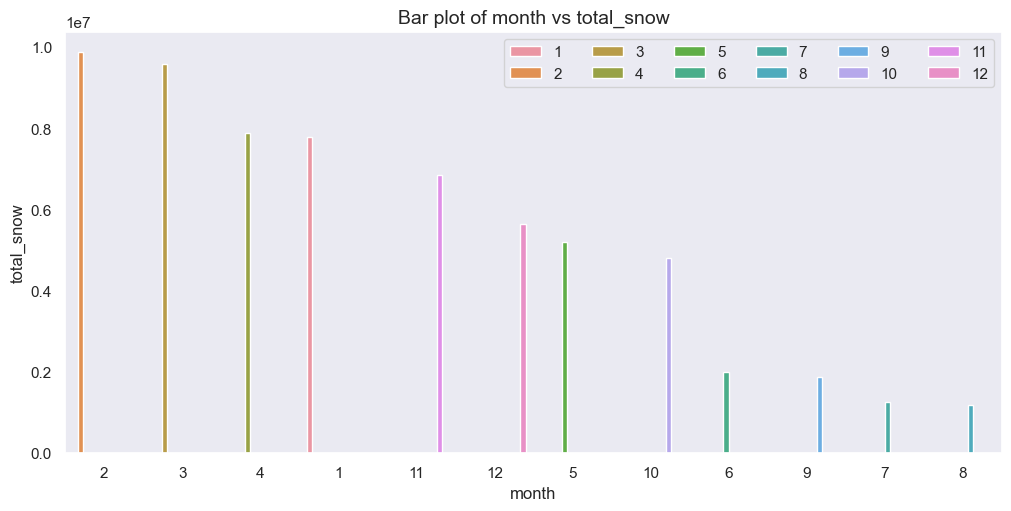

In [242]:
sns.set_theme(style='dark')
fig,ax = plt.subplots(figsize=(10,5),constrained_layout=True)
my_order = snow_bar.sort_values("total_snow", ascending=False)['month']
sns.barplot(data=snow_bar,x="month",y="total_snow",hue="month",order=my_order)
ax.set_title(f"Bar plot of month vs total_snow",fontsize=14)
plt.legend(loc="upper right",ncol=6)

**Observations**

Based on the observations on the bar chart by months, the top five months with the highest amount of snow are;
- February
- March 
- April
- January
- November

In [41]:
snow_bar.columns
['total_snow', 'average_snow']

['total_snow', 'average_snow']

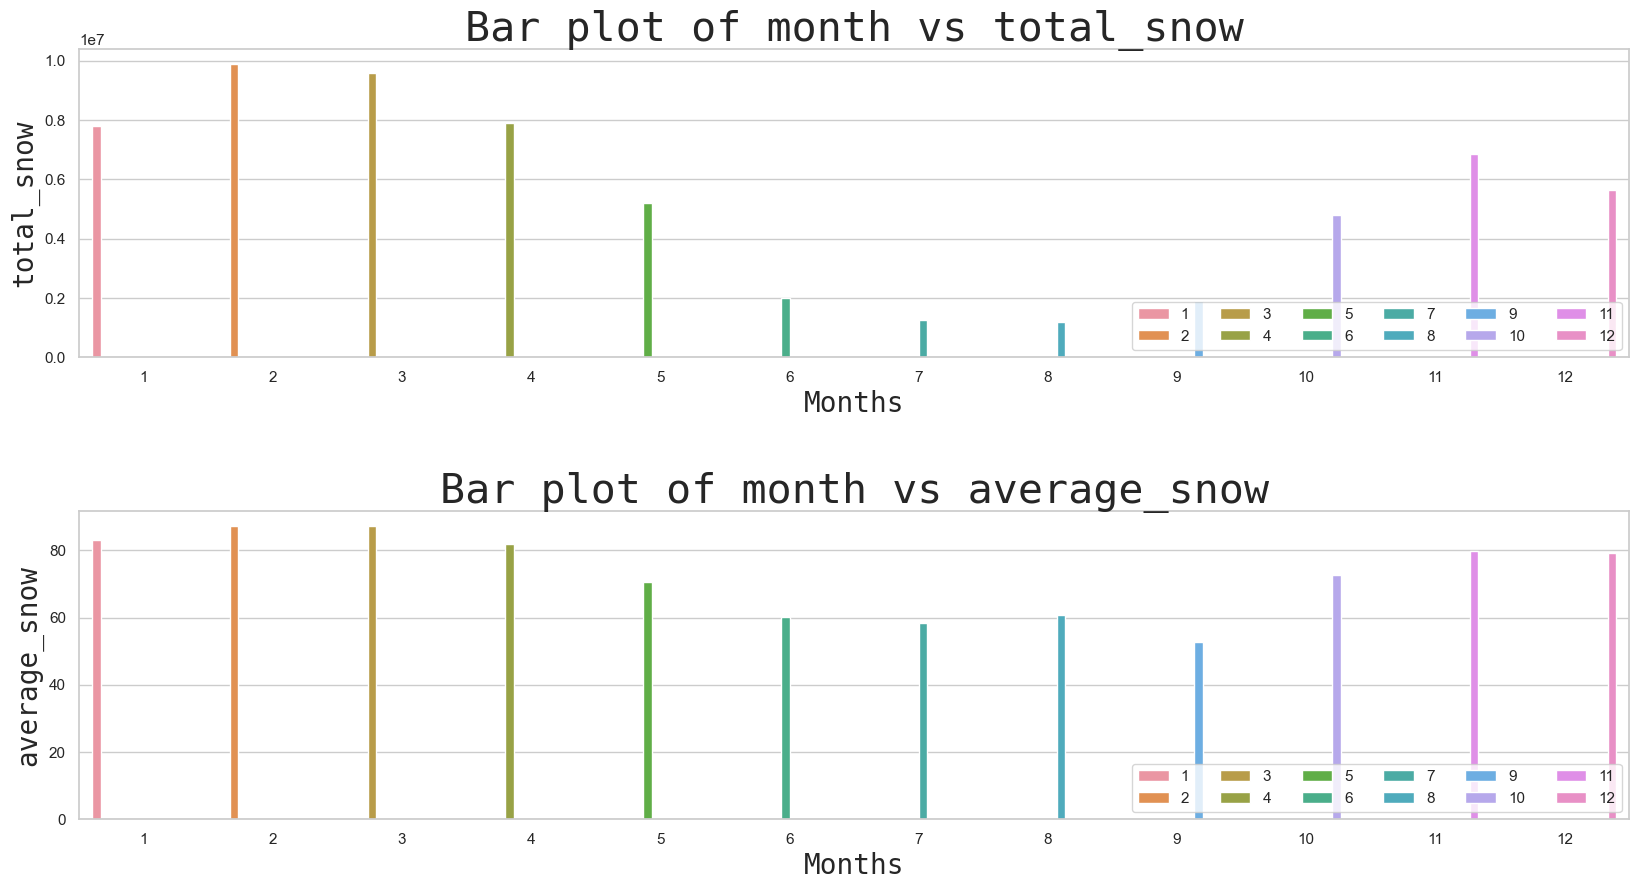

In [246]:
# https://www.python-graph-gallery.com/191-custom-axis-on-matplotlib-chart
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html
sns.set_theme(style='whitegrid')
fonts1 = {"fontsize":30,"fontfamily":"monospace"}
fonts2 = {"fontsize":20,"fontfamily":"monospace"}
fig,ax = plt.subplots(2,figsize=(20,10),constrained_layout=True)
for index,column in enumerate(snow_bar.iloc[:,1:3]):
    sns.barplot(data=snow_bar,x="month",y=str(column),hue="month",ax=ax[index])
    ax[index].set_title(f"Bar plot of month vs {column}",fontdict=fonts1)
    ax[index].legend(loc="lower right",ncol=6)
    ax[index].set_xlabel("Months",fontdict=fonts2)
    ax[index].set_ylabel(f"{column}",fontdict=fonts2)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)

**Observations**

Based on the observations on the bar chart by months, average snow for each month (top 5);
- February
- March 
- April
- January
- November

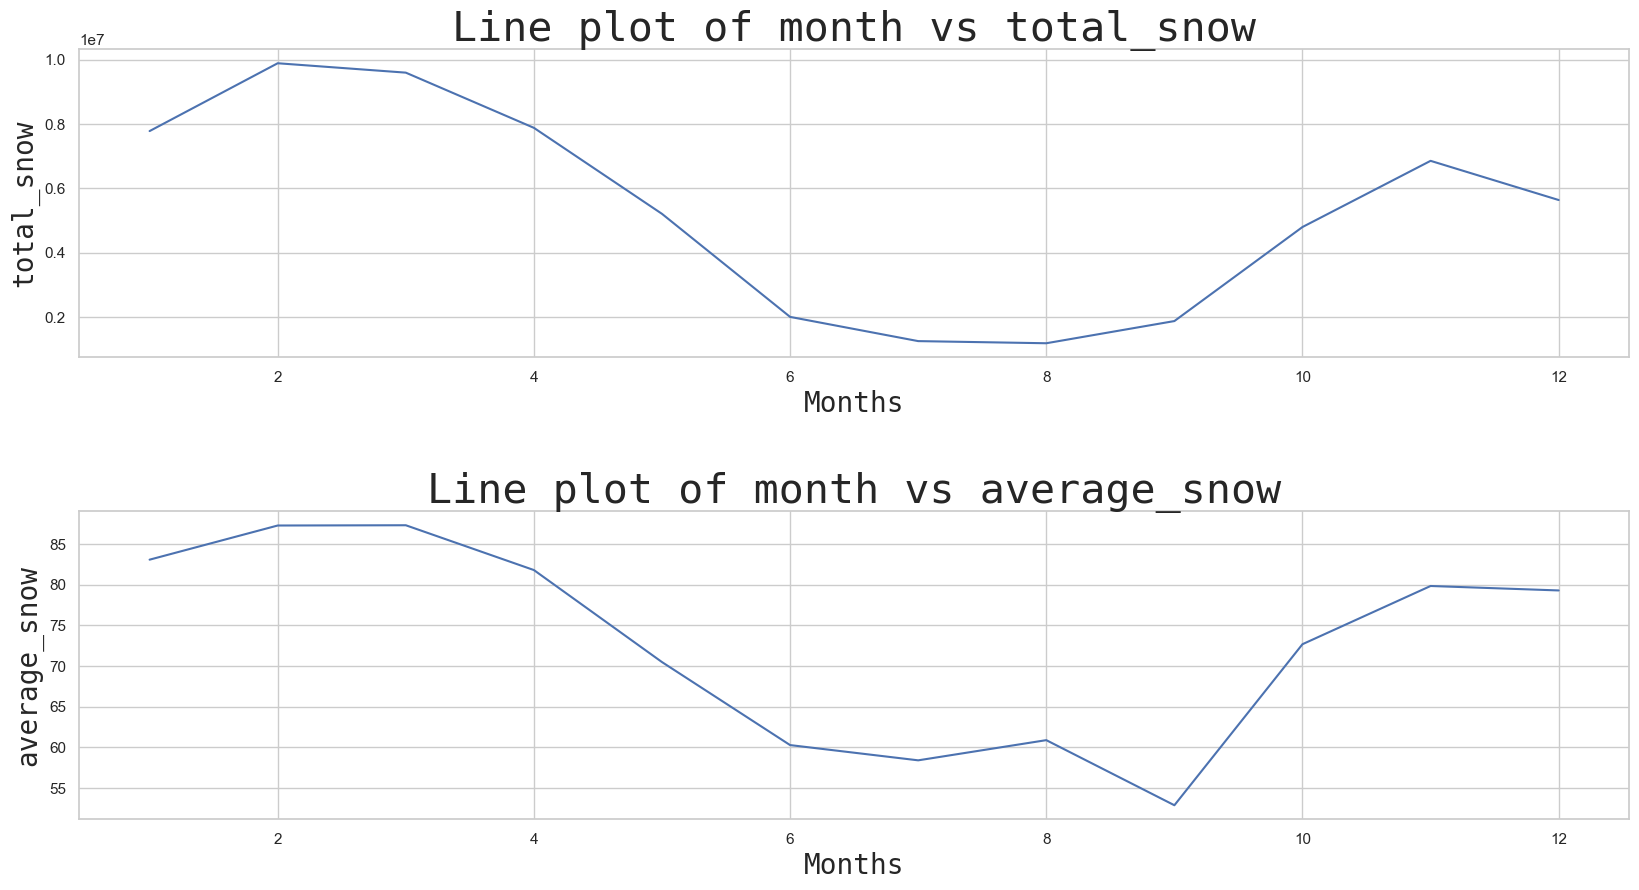

In [247]:
sns.set_theme(style='whitegrid')
fonts1 = {"fontsize":30,"fontfamily":"monospace"}
fonts2 = {"fontsize":20,"fontfamily":"monospace"}
fig,ax = plt.subplots(2,figsize=(20,10),constrained_layout=True)
for index,column in enumerate(snow_bar.iloc[:,1:3]):
    sns.lineplot(data=snow_bar,x="month",y=str(column),ax=ax[index])
    ax[index].set_title(f"Line plot of month vs {column}",fontdict=fonts1)
    # ax[index].legend(loc="upper right",ncol=6)
    ax[index].set_xlabel("Months",fontdict=fonts2)
    ax[index].set_ylabel(f"{column}",fontdict=fonts2)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)

The above graph confirms the bar chart.

In [44]:
analysis_snow.columns

Index(['month', 'latitude', 'longitude', 'snow'], dtype='object')

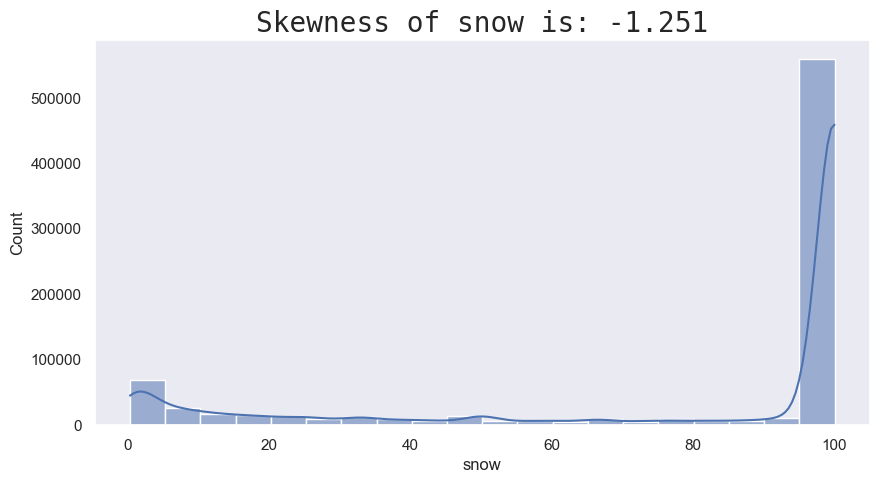

In [45]:
fig,ax = plt.subplots(figsize=(10,5),constrained_layout=True)

sns.histplot(data=analysis_snow,kde=True,x="snow",bins=20)
ax.set_title(f'Skewness of snow is: {np.around(analysis_snow["snow"].skew(axis=0),3)}',fontdict=fonts2)
# fig.suptitle("Histogram plot",fontsize=30,fontdict=fonts1)
plt.subplots_adjust(hspace=0.5,wspace=0.5)

In [262]:
# analysis_snow[analysis_snow["snow"] == 100].value_counts().sum()
# # 509483 data points 

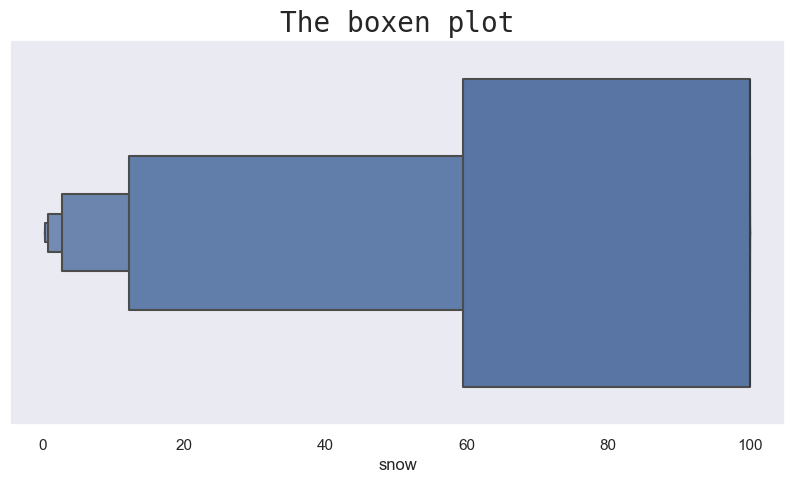

In [51]:
fig,ax = plt.subplots(figsize=(10,5),constrained_layout=True)


sns.boxenplot(data=analysis_snow,x='snow')
# sns.boxplot(data=analysis_snow,x='snow')
ax.set_title(f'The boxen plot',fontdict=fonts2)
plt.subplots_adjust(hspace=0.5,wspace=0.5)

**Observation**

- There is high concentration between 60 - 100
- Little variance is spotted.

In [263]:
# fig,ax = plt.subplots(figsize=(10,5),constrained_layout=True)


# sns.violinplot(data=analysis_snow,x='snow', inner="quartile")
# ax.set_title(f'The Violin plot',fontdict=fonts2)
# plt.subplots_adjust(hspace=0.5,wspace=0.5)

**Resorts analysis**

In [56]:
analysis_resorts.columns

Index(['resort', 'latitude', 'longitude', 'country', 'continent', 'price',
       'season', 'highest_point', 'lowest_point', 'beginner_slopes',
       'intermediate_slopes', 'difficult_slopes', 'total_slopes',
       'longest_run', 'snow_cannons', 'surface_lifts', 'chair_lifts',
       'gondola_lifts', 'total_lifts', 'lift_capacity', 'child_friendly',
       'snowparks', 'nightskiing', 'summer_skiing'],
      dtype='object')

<AxesSubplot:>

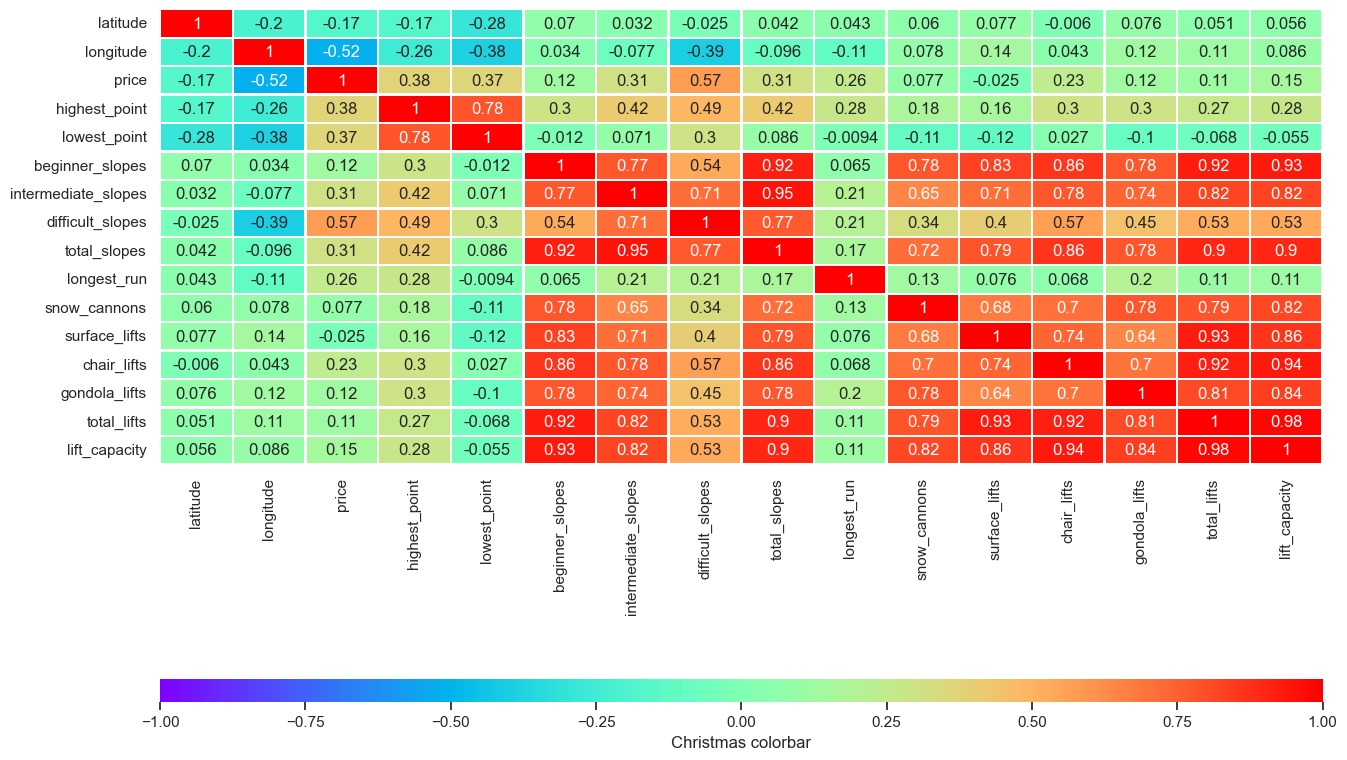

In [57]:
sns.set_theme()
grid_kws = {"height_ratios": (1,.05),"hspace":.9}
fig,(ax, cbar_ax) =plt.subplots(2,figsize=(15, 9),gridspec_kw=grid_kws)


sns.heatmap(analysis_resorts.corr(),
            ax=ax,
            cbar_ax=cbar_ax,
            cmap="rainbow",
            annot=True,
            vmin=-1,
            vmax=1,
            cbar_kws={"orientation":"horizontal",'label':"Christmas colorbar"},
            linewidths=1
            )

In [160]:
pearson_corr = analysis_resorts.corr()

upper_bound = pearson_corr >= 0.75
lower_bound = pearson_corr <= -0.45
cond_final = (upper_bound | lower_bound)
filtered_correlation = pearson_corr[cond_final]

# Filtering the heatmap

<AxesSubplot:>

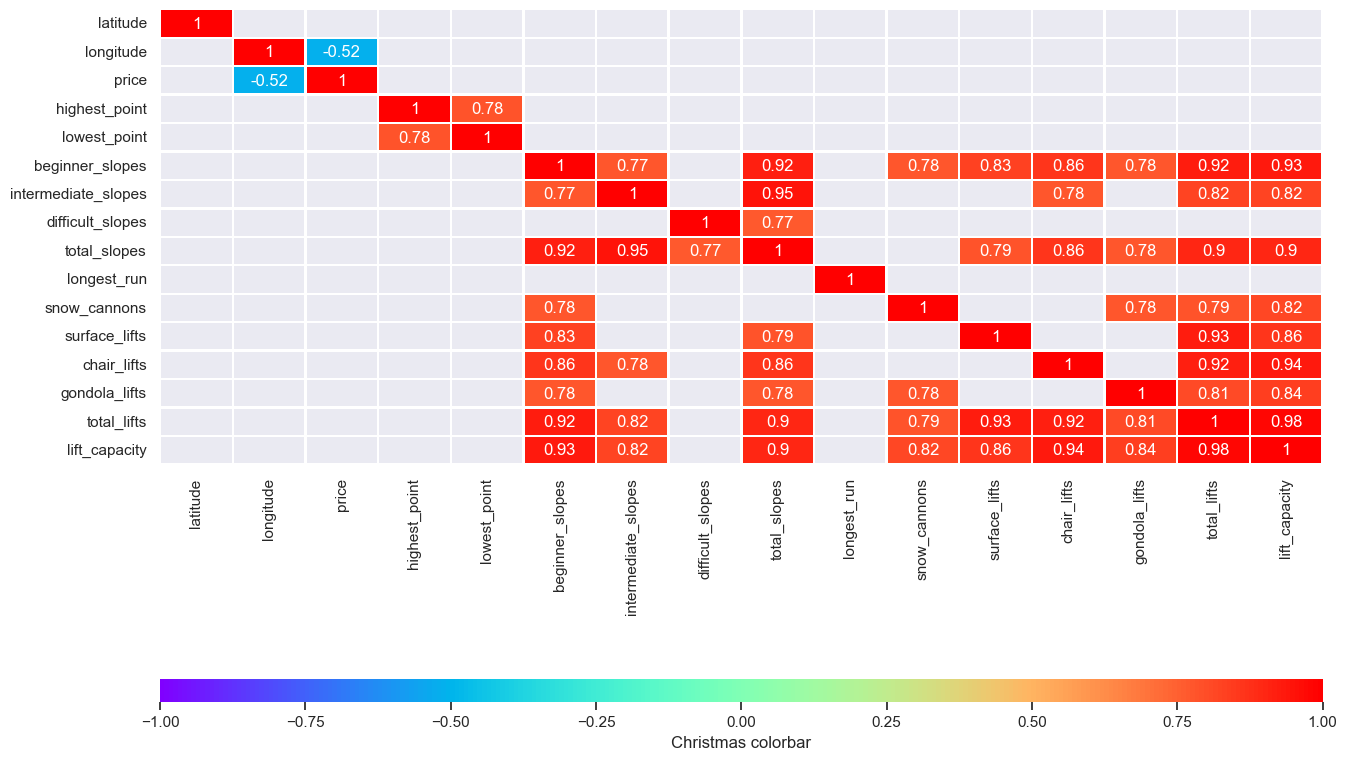

In [161]:
sns.set_theme()
grid_kws = {"height_ratios": (1,.05),"hspace":.9}
fig,(ax, cbar_ax) =plt.subplots(2,figsize=(15, 9),gridspec_kw=grid_kws)


sns.heatmap(filtered_correlation,
            ax=ax,
            cbar_ax=cbar_ax,
            cmap="rainbow",
            annot=True,
            vmin=-1,
            vmax=1,
            cbar_kws={"orientation":"horizontal",'label':"Christmas colorbar"},
            linewidths=1
            )

**Observation**

From the heatmap the follow can be noticed;
- A negative correlation between price and longitude
- Strong positive correlaton between the following;
    - highest_point 
    - lowest_point 
    - beginner_slopes
    - intermediate_slopes 
    - difficult_slopes 
    - total_slopes
    - longest_run 
    - snow_cannons 
    - surface_lifts 
    - chair_lifts
    - gondola_lifts 
    - total_lifts
    - lift_capacity

The following line and scatter plots gives an example of the correlation earlier mentioned and shown on the heatmap.

In [ ]:
def line_plots(x:str,y:str):
    try:
        sns.set_theme(style='darkgrid',palette='husl')
        fig,ax = plt.subplots(figsize=(20,5))
        sns.lineplot(data=analysis_resorts,x=x,y=y)
        ax.set_title(f'Line plot of {x} vs {y}',fontdict=fonts1)
        ax.set_xlabel(f"Total Slopes", fontdict=fonts2)
        ax.set_ylabel(f"Total Lifts", fontdict=fonts2)
        # ax.tick_params(axis='x', rotation=90)
    except ValueError:
        print(f"The wrong Key was passed\nPlease look are the information below\n")
        analysis_resorts.info(memory_usage='deep')

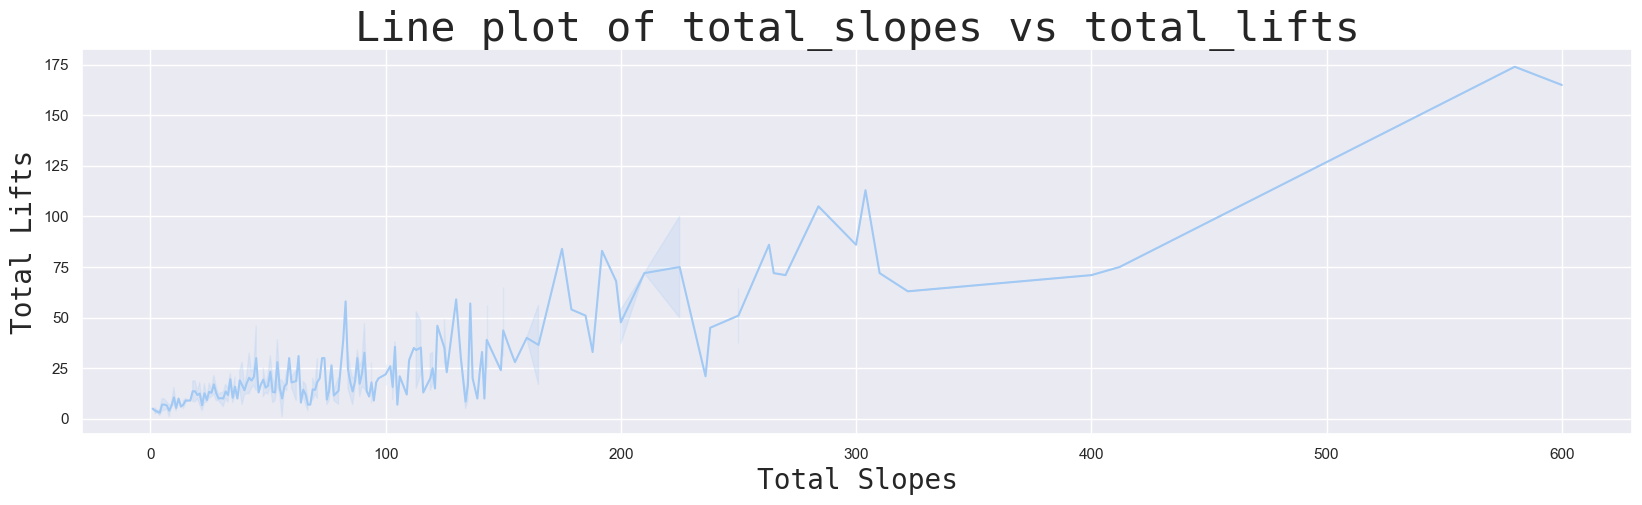

In [ ]:
line_plots("total_slopes","total_lifts")

In [ ]:
def scatter_plots(x:str,y:str):
    try:
        my_palette =sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
        sns.set_theme(style='whitegrid')
        fig,ax = plt.subplots(figsize=(20,5))
        sns.scatterplot(data=analysis_resorts,x=x,y=y,hue=x, size=x,palette=my_palette)
        ax.set_title(f'Scatter plot of {x} vs {y}',fontdict=fonts1)
        ax.set_xlabel(f"Total Slopes", fontdict=fonts2)
        ax.set_ylabel(f"Total Lifts", fontdict=fonts2)
        # ax.tick_params(axis='x', rotation=90)
        ax.legend(ncol=6, loc="upper left")
    except ValueError:
        print(f"The wrong Key was passed\nPlease look are the information below\n")
        analysis_resorts.info(memory_usage='deep')

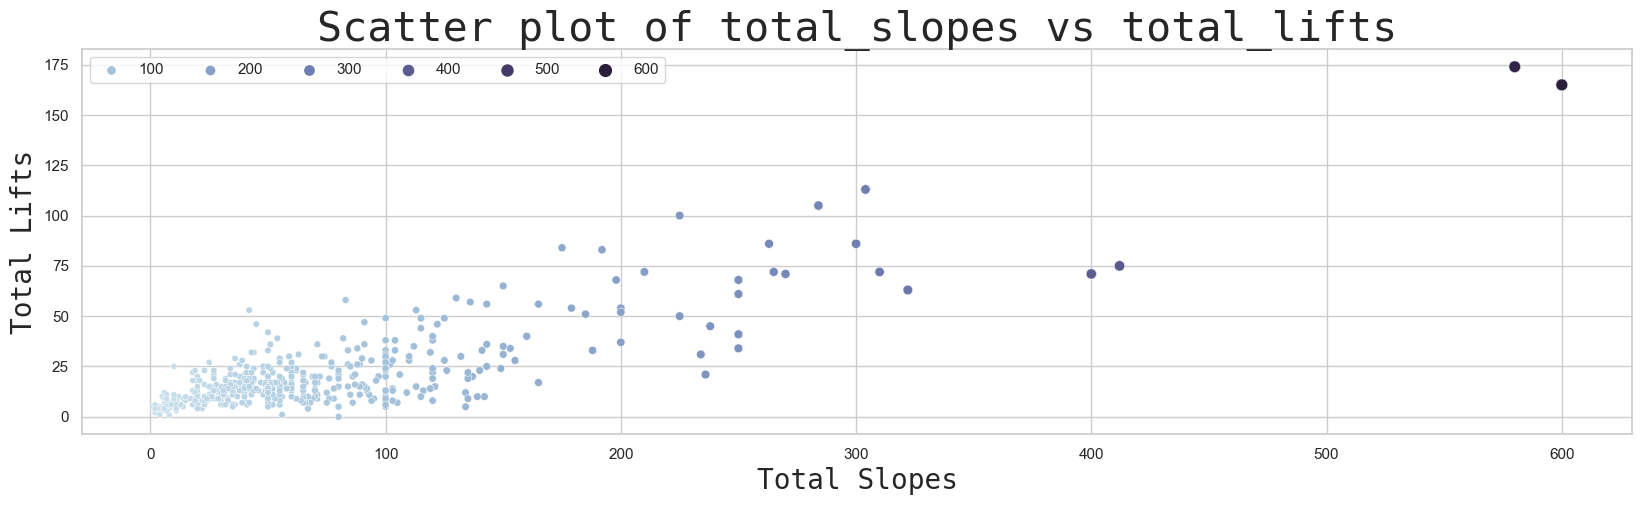

In [ ]:
scatter_plots("total_slopes","total_lifts")

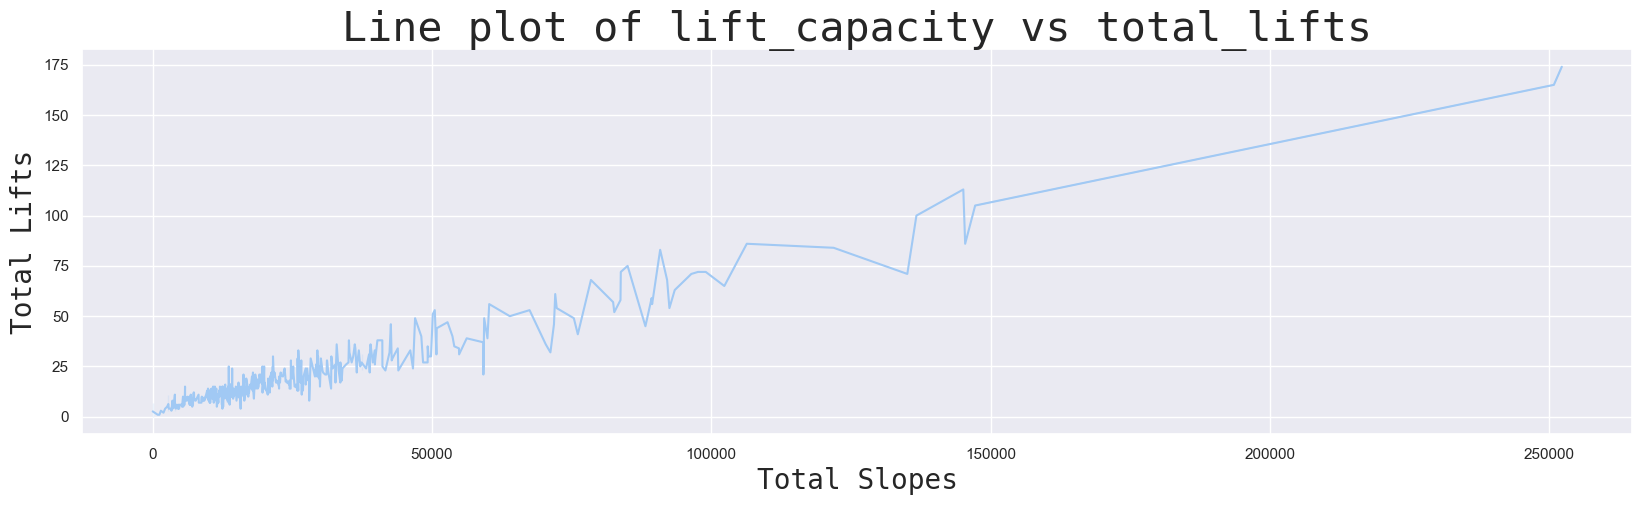

In [ ]:
line_plots("lift_capacity","total_lifts")

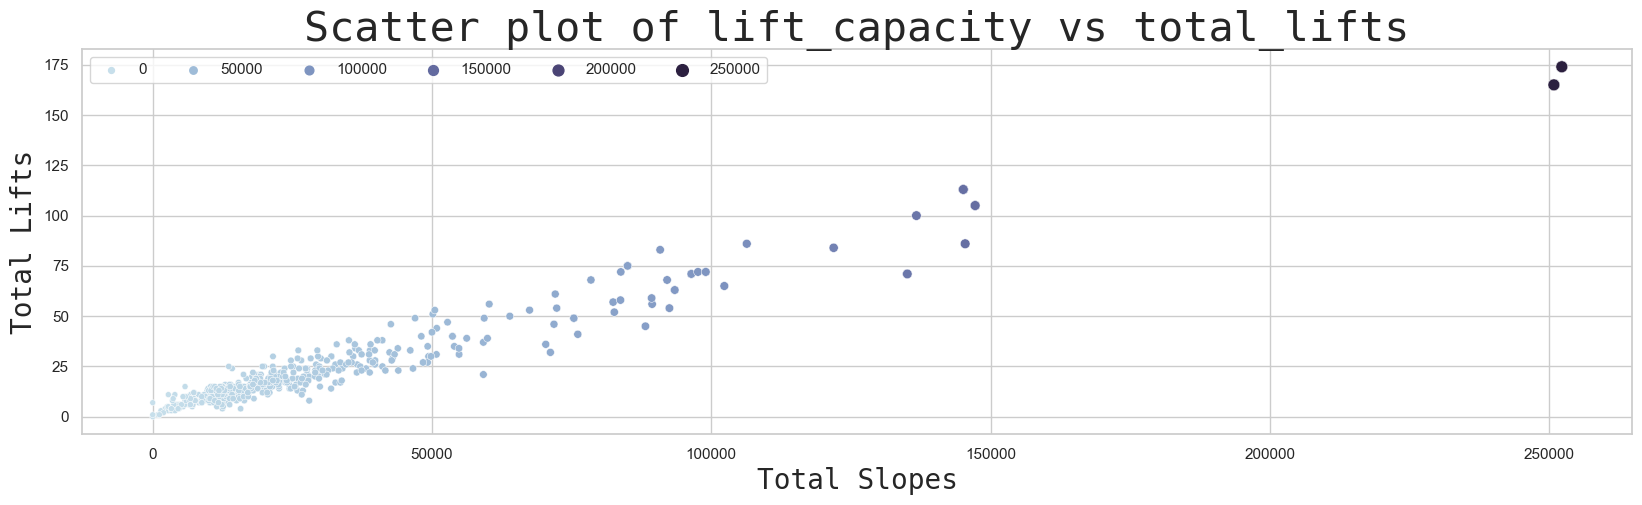

In [ ]:
scatter_plots("lift_capacity","total_lifts")

In [279]:
# analysis_resorts.describe()

In [280]:
# analysis_resorts.describe(include="category")

In [113]:
def plotting_count(x:str,hue:str):    
    try:
        fig, ax = plt.subplots(figsize=(20,5))
        sns.set_theme(style='white')

        ordering = analysis_resorts[x].value_counts()
        my_palette = sns.color_palette('bright')
        sns.countplot(data=analysis_resorts, x=x, hue=hue,palette=my_palette,
        order=ordering.sort_values().index[::-1], # descending order
        )
        ax.tick_params(axis='x', rotation=90)
        ax.set_title(f'Count plot of number of {x} with {hue}',fontsize=20)

        ax.set_xlabel(f"{x}", fontdict={'fontsize':20})
        ax.set_ylabel("Count", fontdict={'fontsize':20})
        ax.legend(loc="upper right")
    except ValueError:
            print(f"The wrong Value was passed\nPlease look are the information below\n")
            analysis_resorts.info(memory_usage='deep')
    except KeyError:
            print(f"The wrong Key was passed\nPlease look are the information below\n")
            analysis_resorts.info(memory_usage='deep')

In [264]:
# analysis_resorts.select_dtypes(include="category").columns

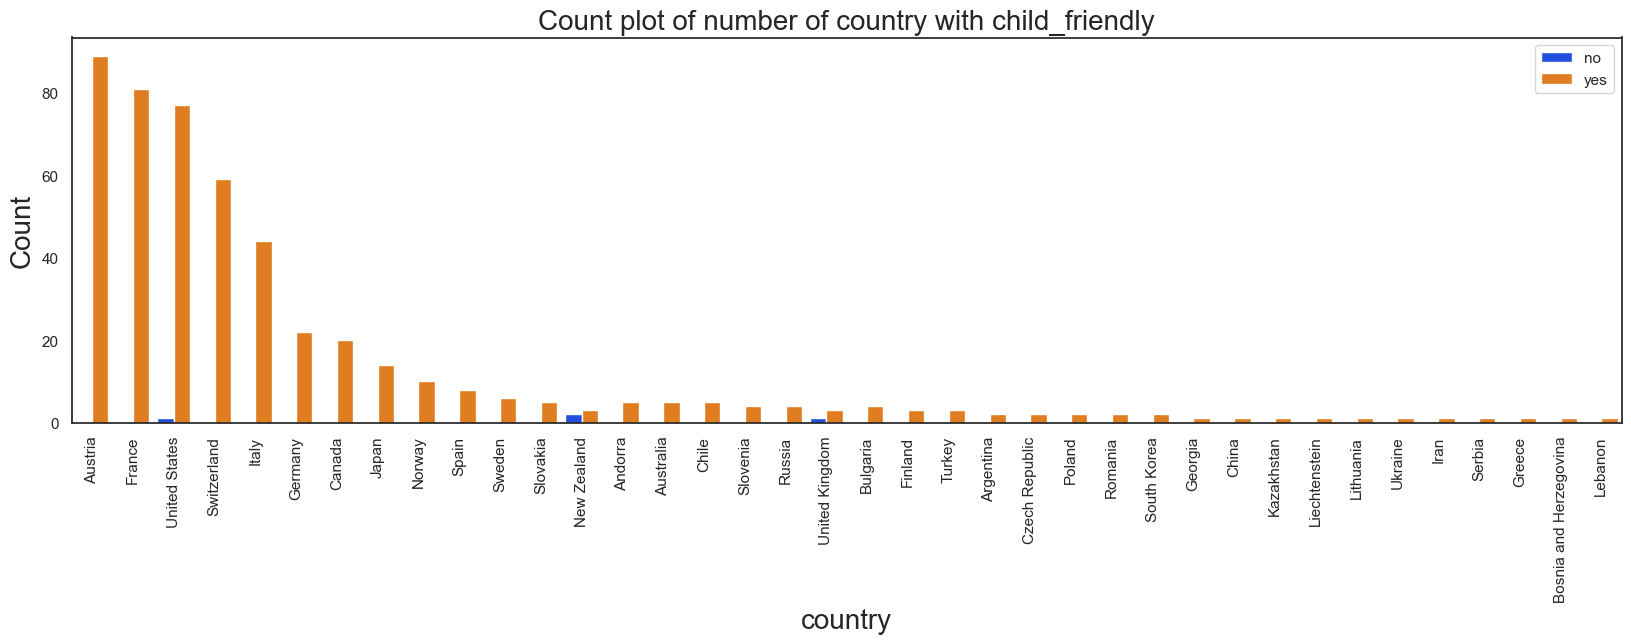

In [115]:
plotting_count('country','child_friendly')

**Observations**

Top 5 ski resorts that are child friendly;
- Austria
- France
- USA (some resorts are not child friendly)
- Switzerland
- Italy

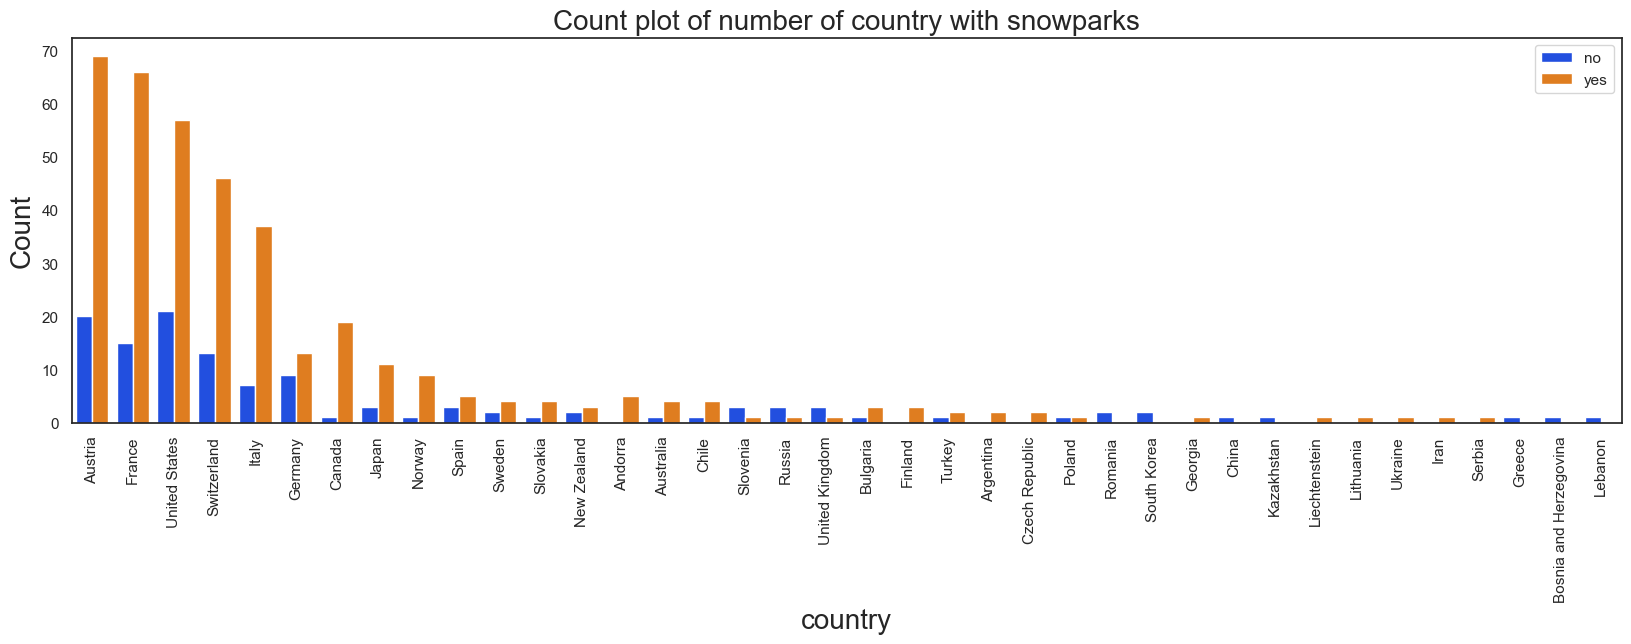

In [116]:
plotting_count('country','snowparks')

**Observations**

The following countries have snow parks (top 5):
- Austria
- France
- USA 
- Switzerland
- Italy

*Not all parts of the countries does have a snow park*

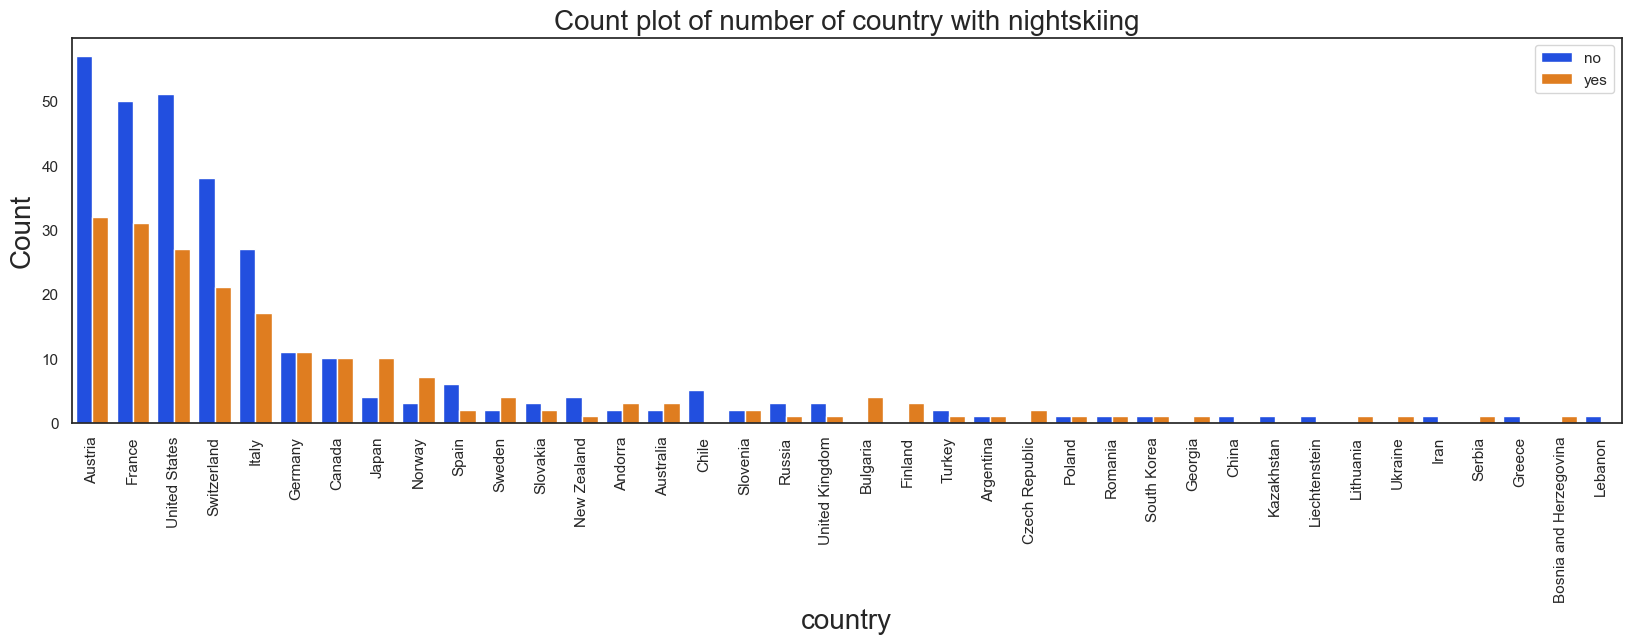

In [117]:
plotting_count('country','nightskiing')

**Observations**

The following countries don't have night skiing (top 5):
- Austria
- France
- USA 
- Switzerland
- Italy

*Some parts of the countries does have night skiing*

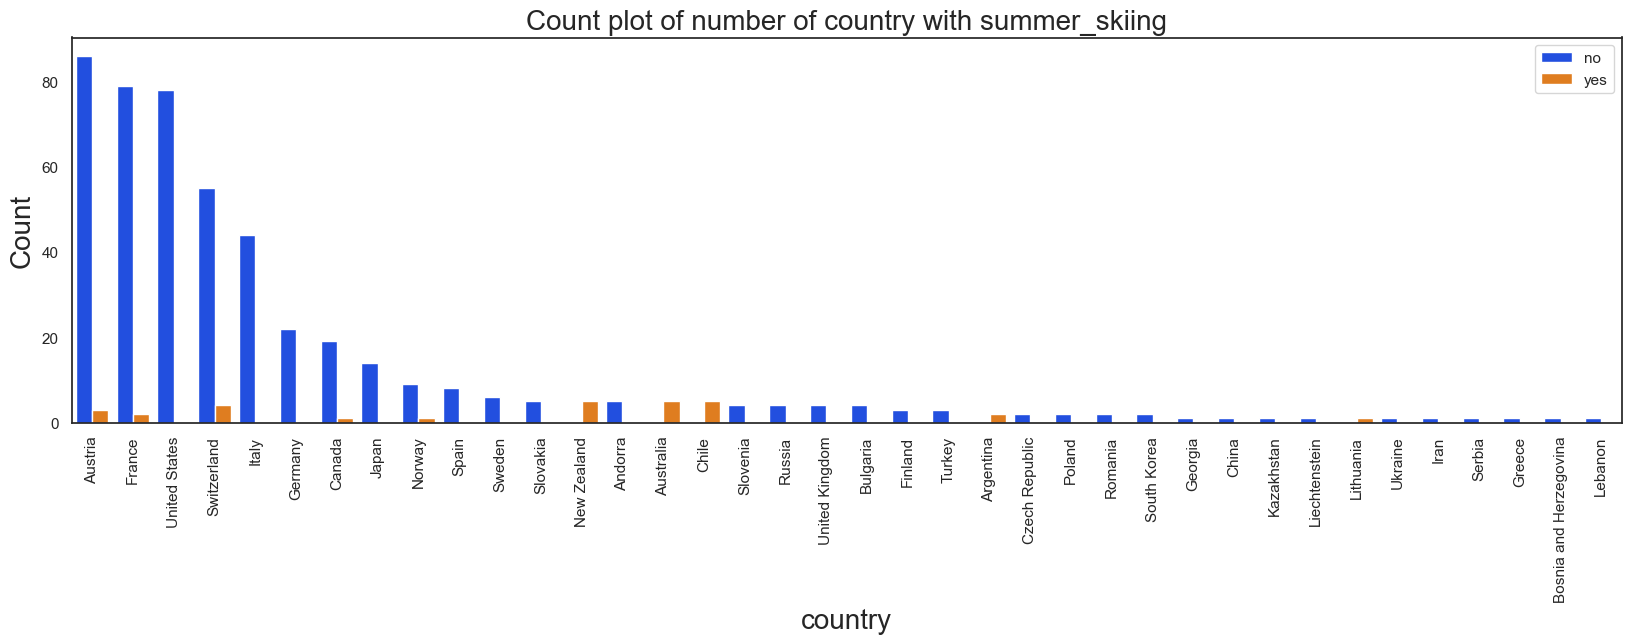

In [118]:
plotting_count('country','summer_skiing')

**Observations**

Most countries do not have summer skiing.

In [ ]:
[
'resort', 'latitude', 'longitude', 'country', 'continent', 'price',
'season', 'highest_point', 'lowest_point', 'beginner_slopes',
'intermediate_slopes', 'difficult_slopes', 'total_slopes',
'longest_run', 'snow_cannons', 'surface_lifts', 'chair_lifts',
'gondola_lifts', 'total_lifts', 'lift_capacity', 'child_friendly',
'snowparks', 'nightskiing', 'summer_skiing'
]

In [275]:
def plotting_bar(x:str,group:str):
    try:
        grouped_agg = analysis_resorts.groupby(group)[x].agg([(f"Calculated Mean {x}", 'mean'),(f"Calculated Deviation {x}", 'std')]).reset_index()
        fig,ax = plt.subplots(1,2,figsize=(20,10))
        
        order_mean = grouped_agg.sort_values(f"Calculated Mean {x}",ascending=False)[group]
        order_std = grouped_agg.sort_values(f"Calculated Deviation {x}",ascending=False)[group]
        my_palette = sns.color_palette("husl",2)
        # my_palette = sns.crayon_palette(["Orange-Red","Green"])
        sns.set_theme(style="whitegrid")
        sns.barplot(order = order_mean,data=grouped_agg, x=group, y=f'Calculated Mean {x}', ax=ax[0], palette=my_palette)
        sns.barplot(order =order_std,data=grouped_agg, x=group, y=f'Calculated Deviation {x}', ax=ax[1], palette=my_palette)

        ax[0].set_title(f'Calculated Mean {x}',fontsize=20)
        ax[0].set_xlabel(f"{group}", fontdict={'fontsize':20})
        ax[0].set_ylabel(f"Calculated Mean {x}", fontdict={'fontsize':20})
        ax[0].tick_params(axis='x', rotation=90)
        

        ax[1].set_title(f'Calculated Deviation {x}',fontsize=20)
        ax[1].set_xlabel(f"{group}", fontdict={'fontsize':20})
        ax[1].set_ylabel(f"Calculated Deviation {x}", fontdict={'fontsize':20})
        ax[1].tick_params(axis='x', rotation=90)
    except KeyError:
            print(f"The wrong Key was passed\nPlease look are the information below\n")
            analysis_resorts.info(memory_usage='deep')

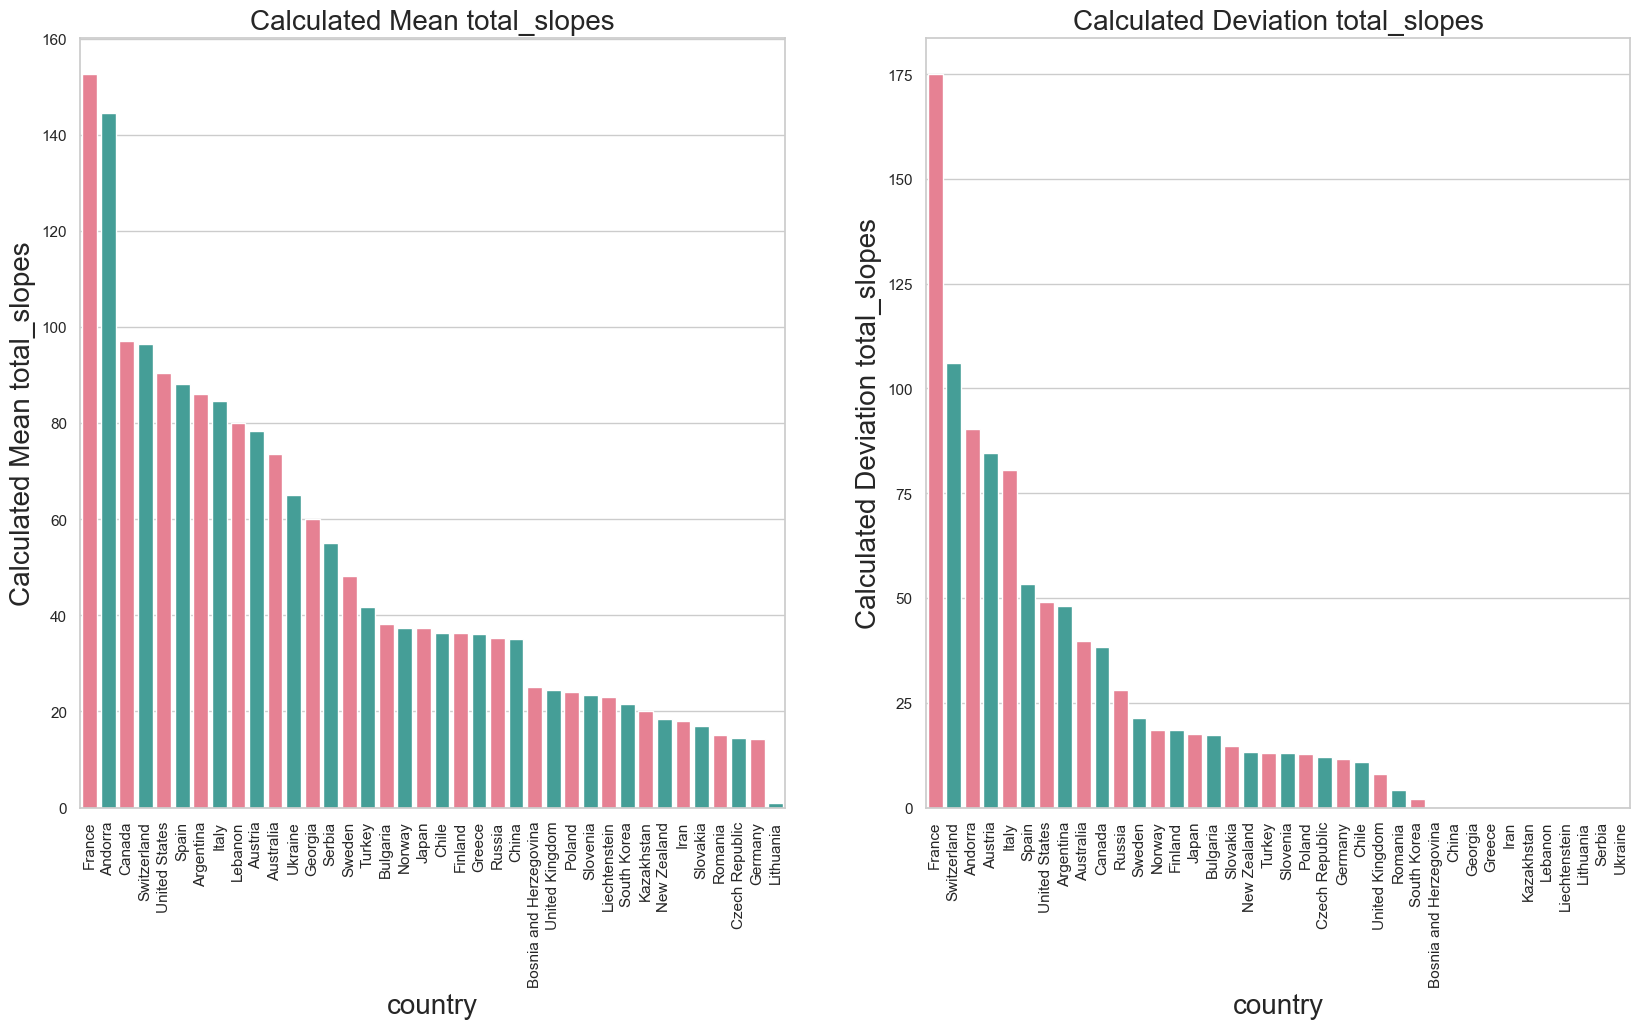

In [277]:
plotting_bar('total_slopes',group='country') 

**Observations**

Countries mean slopes at differnt resorts (from total_slopes) (top 5);
- France
- Andorra
- Canada
- USA 
- Switzerland

*France has the highest deviation from mean, meaning the total slopes at each resort quite spread away from the mean.*

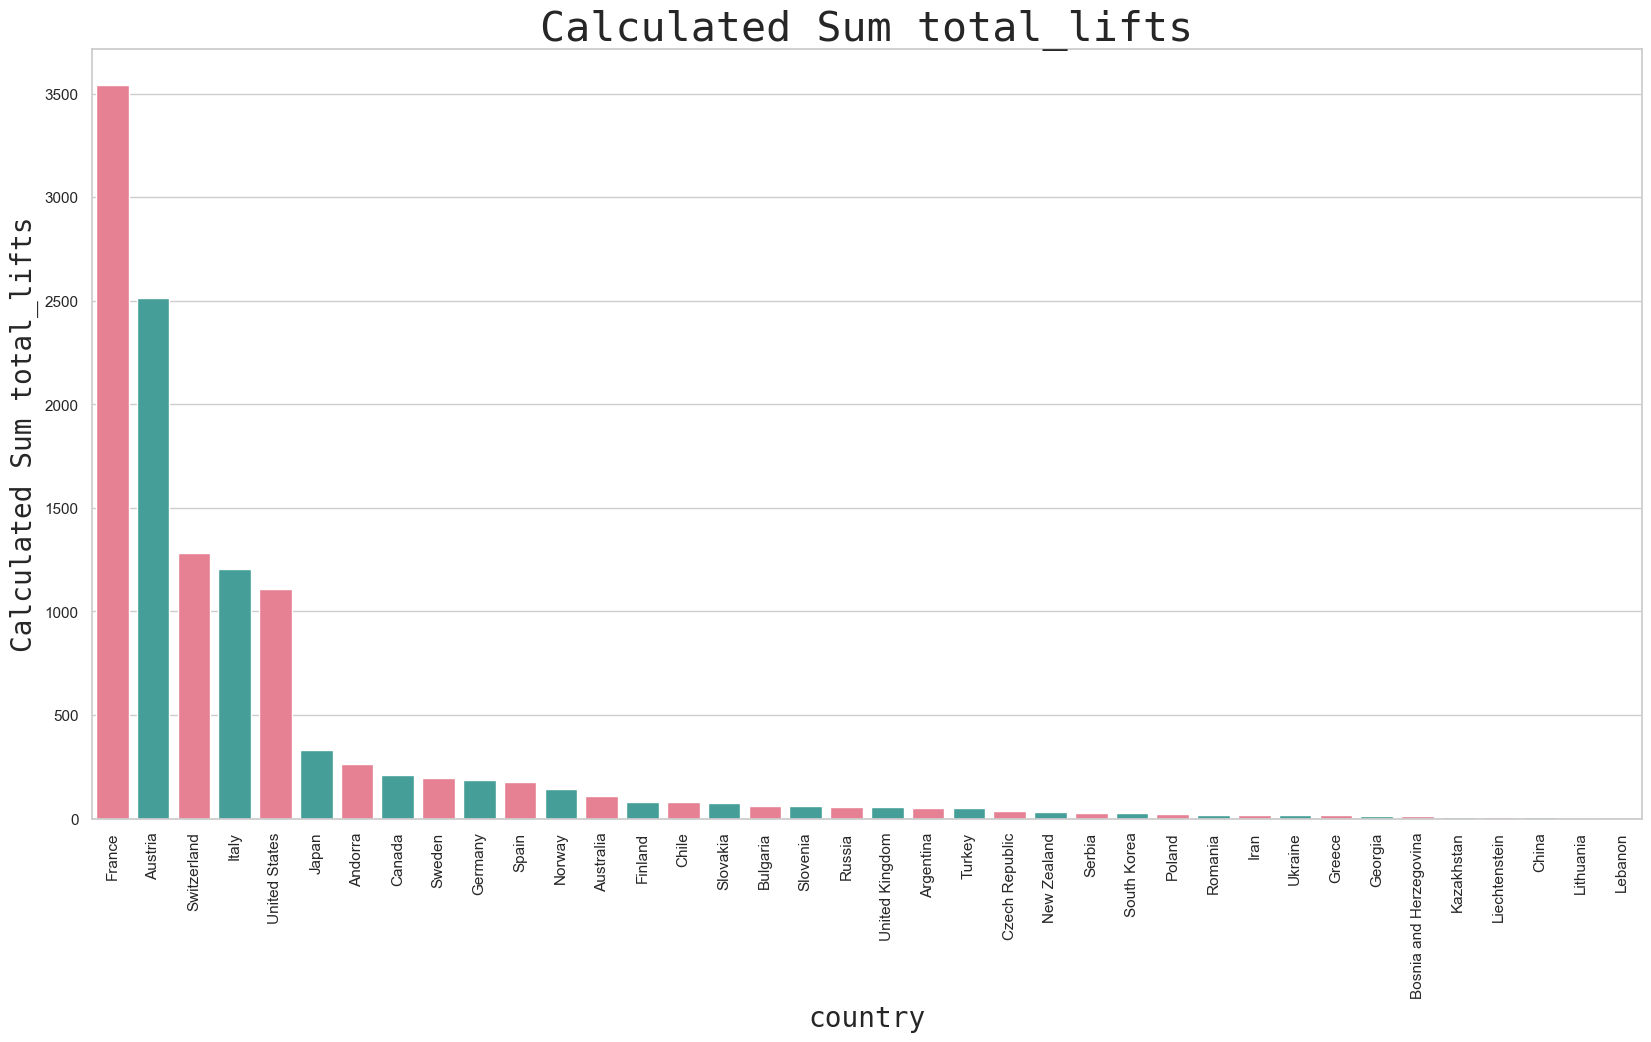

In [278]:
grouped_agg = (analysis_resorts.groupby("country")["total_lifts"]
                                .agg([(f"Calculated Sum total_lifts", 'sum')])
                                .reset_index())

fig,ax = plt.subplots(figsize=(20,10))
my_palette = sns.color_palette("husl",2)

order_mean = (grouped_agg.
        sort_values("Calculated Sum total_lifts",ascending=False)["country"])

sns.set_theme(style="whitegrid")
sns.barplot(order = order_mean,data=grouped_agg, x="country", y=f'Calculated Sum total_lifts'
                                , palette=my_palette)

ax.set_title(f'Calculated Sum total_lifts',fontdict=fonts1)
ax.set_xlabel(f"country", fontdict=fonts2)
ax.set_ylabel(f"Calculated Sum total_lifts", fontdict=fonts2)
ax.tick_params(axis='x', rotation=90)

**Observations**

Total lifts by countries (top 5);
- France
- Austria
- Switzerland
- Italy
- USA 

In [162]:
# grouped_agg.sort_values("Calculated Sum total_lifts", ascending=False)

In [215]:
nums = analysis_resorts.select_dtypes(include=np.number)
nums

,latitude,longitude,price,highest_point,lowest_point,beginner_slopes,intermediate_slopes,difficult_slopes,total_slopes,longest_run,snow_cannons,surface_lifts,chair_lifts,gondola_lifts,total_lifts,lift_capacity
0,60.928244,8.383487,46,1450,620,29,10,4,43,6,325,15,6,0,21,22921
1,60.534526,8.206372,44,1178,800,18,12,4,34,2,100,18,6,0,24,14225
2,47.057810,9.828167,48,2110,650,13,12,1,26,9,123,4,4,3,11,16240
3,49.105520,-117.846280,60,2075,1185,20,50,50,120,7,0,2,5,1,8,9200
4,61.230369,10.529014,45,1030,195,33,7,4,44,6,150,14,3,1,18,21060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,42.395007,2.108883,0,2700,1830,9,15,7,31,0,0,11,2,0,13,11865
495,47.451359,11.228630,29,1350,980,6,7,2,15,2,8,9,1,0,10,5850
496,47.406897,10.927998,43,1530,1000,15,5,3,23,3,33,6,4,0,10,5425
497,47.574195,15.789964,42,1774,777,18,6,0,24,0,240,7,2,0,9,14400


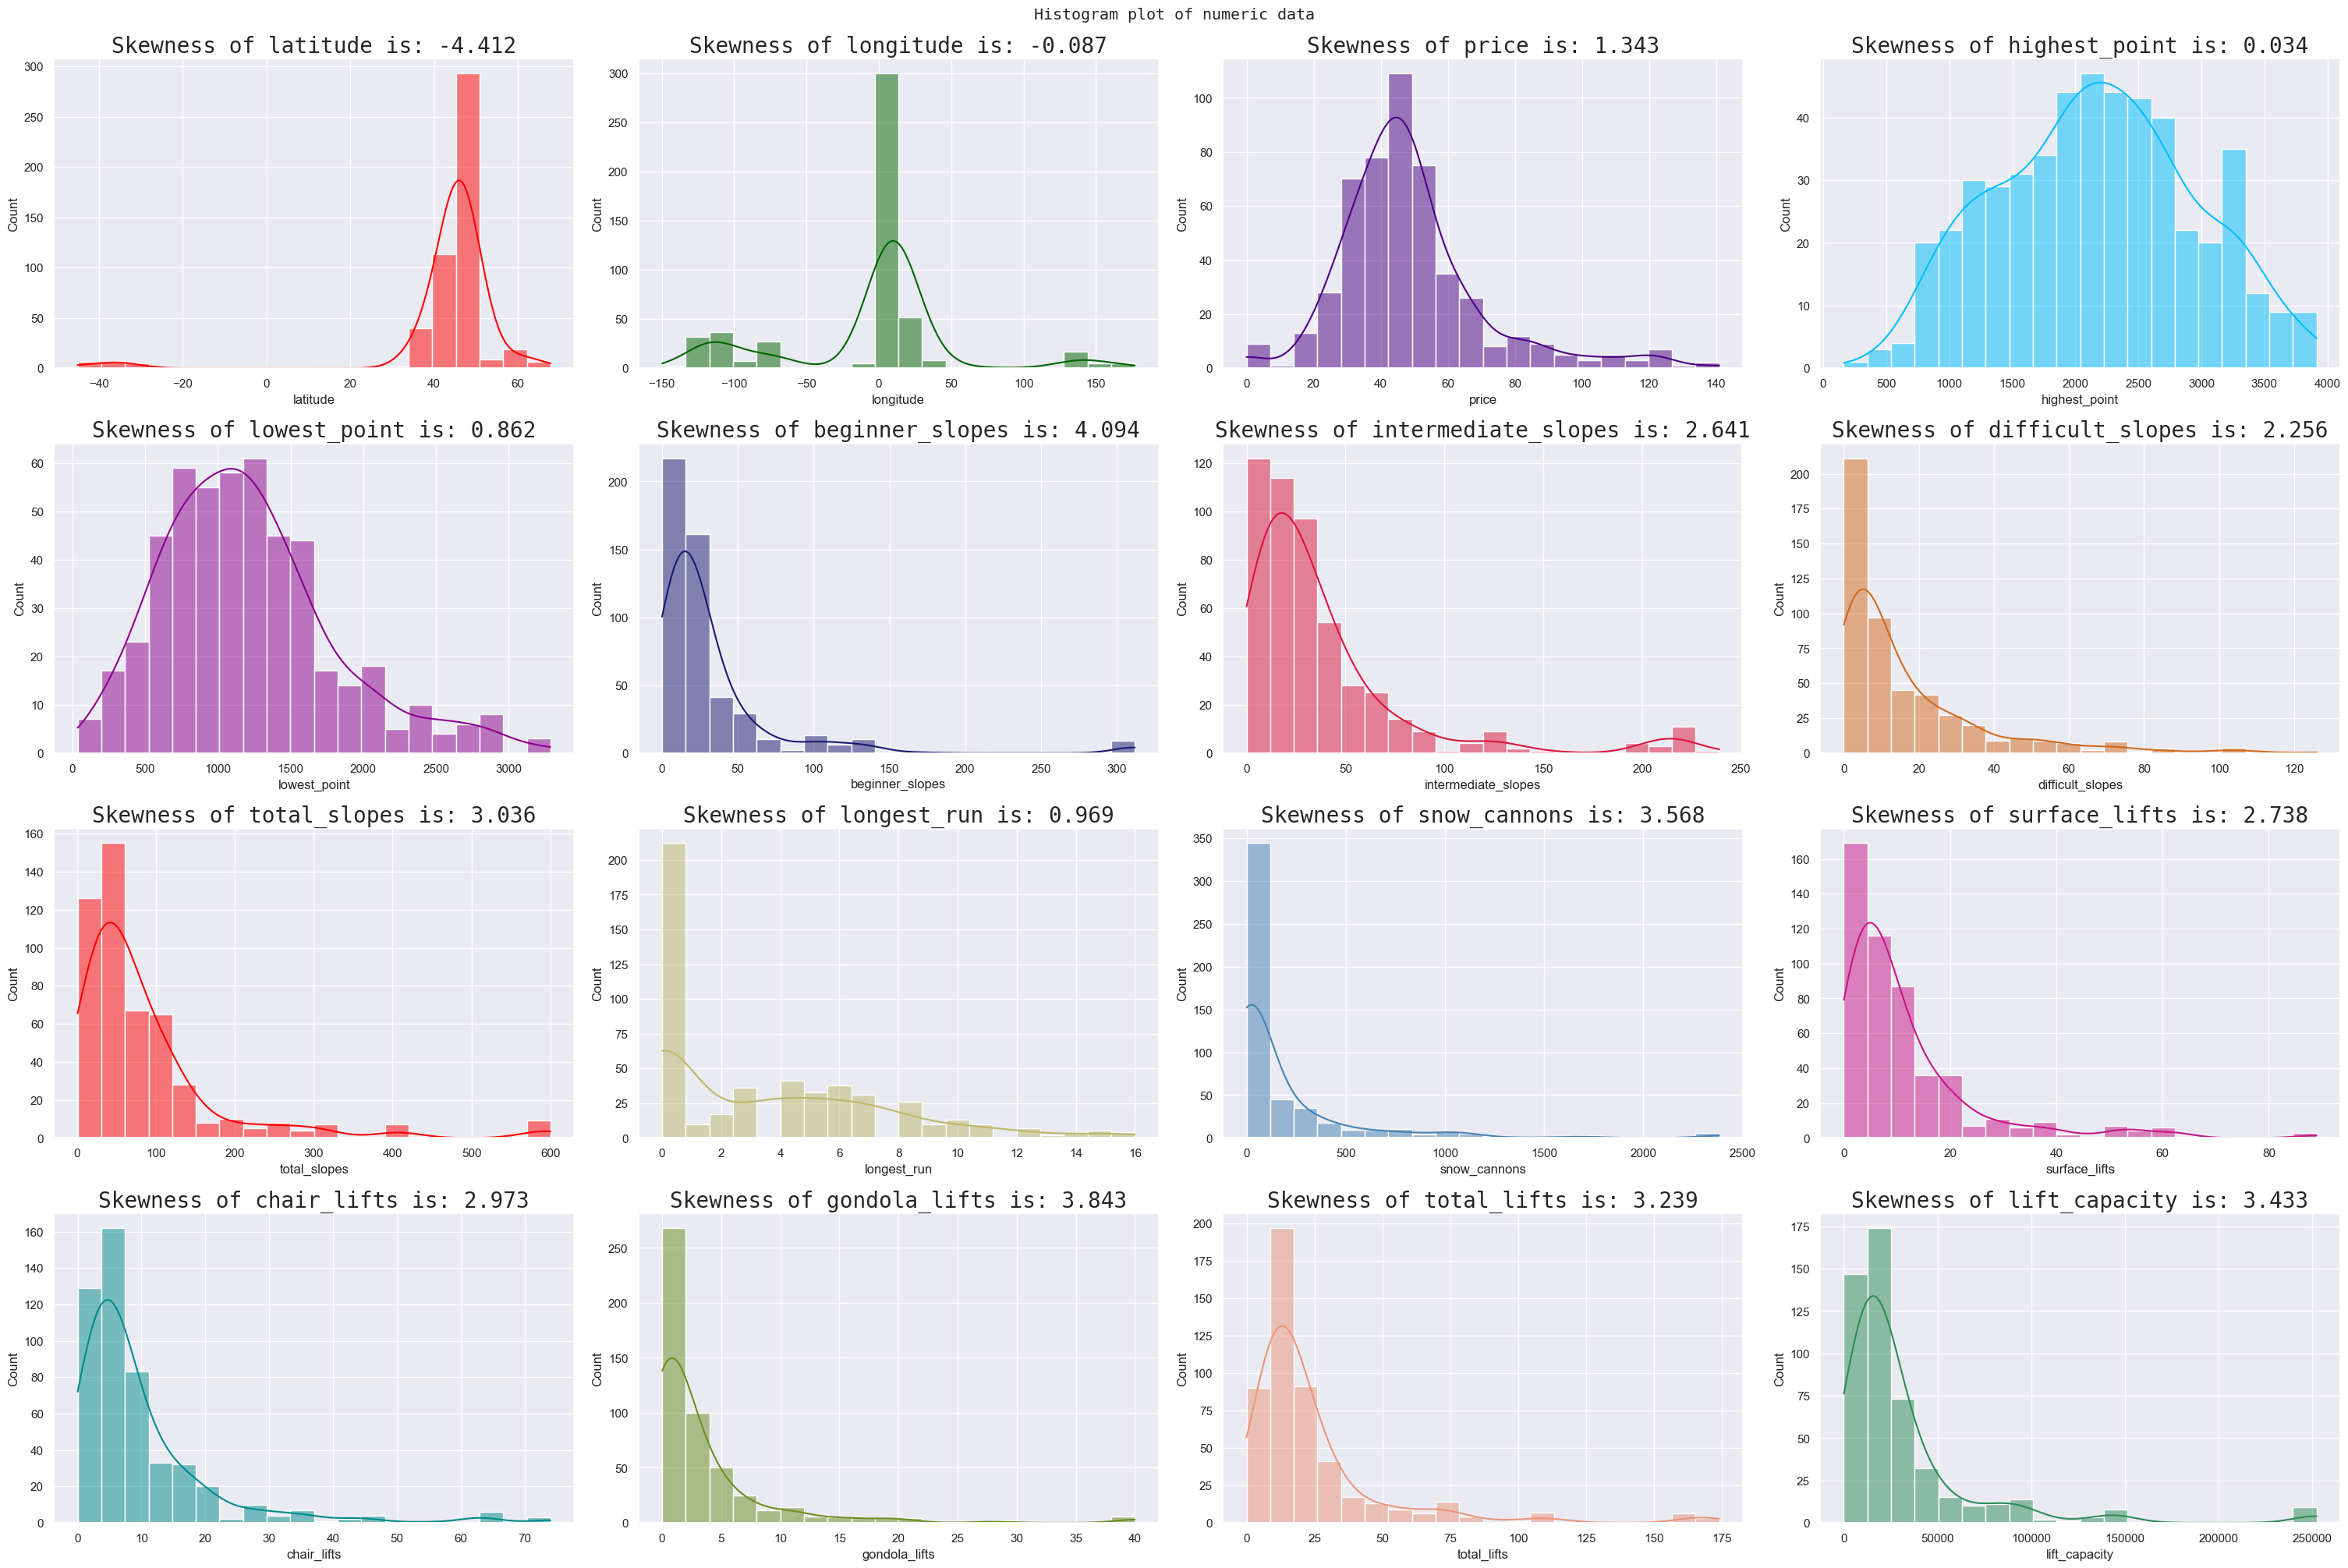

In [231]:
fig, ax = plt.subplots(4,4,figsize=(30,20),constrained_layout=True)
ax = ax.ravel()
colors_list = ['red','darkgreen',
                'indigo','deepskyblue',
                'darkmagenta','midnightblue',
                'crimson','chocolate','red',
                "darkkhaki","steelblue",'mediumvioletred'
                ,"darkcyan","olivedrab",'darksalmon','seagreen']

sns.set_theme(style='darkgrid')
for index,value in enumerate(nums):
        sns.histplot(data=nums,x=value,color=colors_list[index],ax=ax[index],bins=20,kde=True)
        ax[index].set_title(f'Skewness of {value} is: {np.around(nums[value].skew(axis=0),3)}',fontdict=fonts2)
        fig.suptitle("Histogram plot of numeric data",fontdict=fonts1)
        

# Plot-13
        

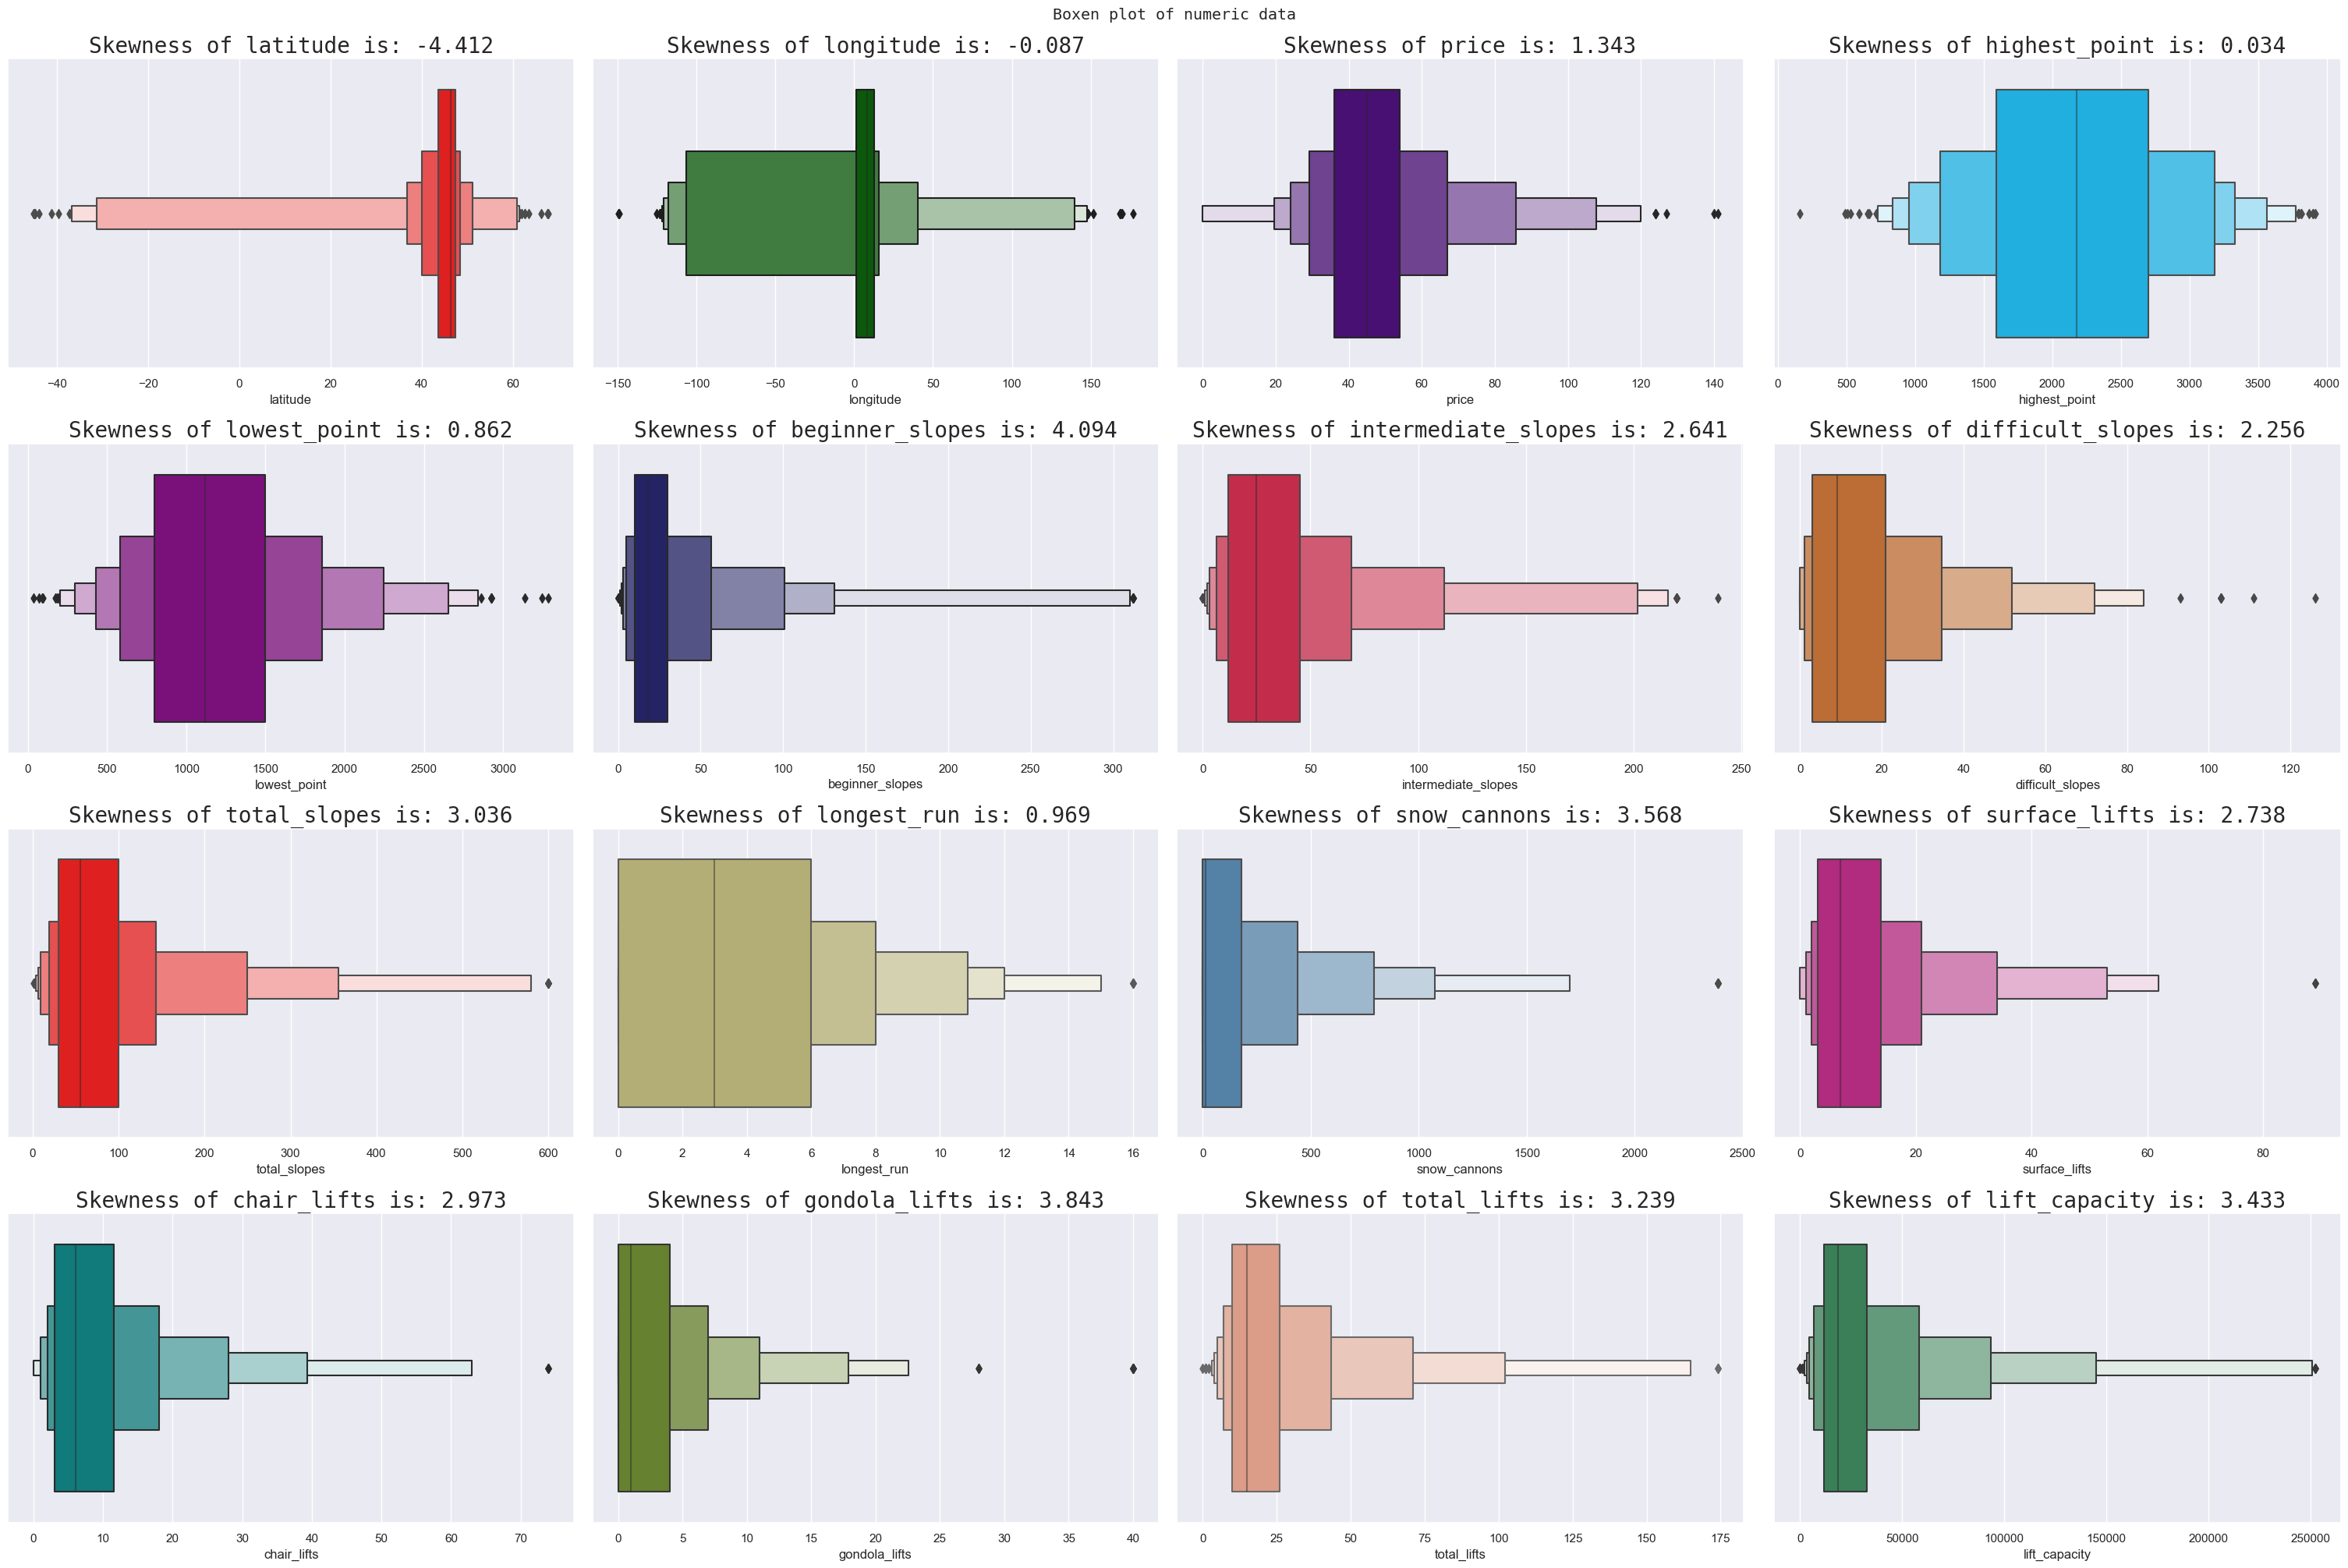

In [234]:
fig, ax = plt.subplots(4,4,figsize=(30,20),constrained_layout=True)
ax = ax.ravel()
colors_list = ['red','darkgreen',
                'indigo','deepskyblue',
                'darkmagenta','midnightblue',
                'crimson','chocolate','red',
                "darkkhaki","steelblue",'mediumvioletred',
                "darkcyan","olivedrab",'darksalmon','seagreen']

sns.set_theme(style='darkgrid')
for index,value in enumerate(nums):
        sns.boxenplot(data=nums,x=value,color=colors_list[index],ax=ax[index])
        ax[index].set_title(f'Skewness of {value} is: {np.around(nums[value].skew(axis=0),3)}',fontdict=fonts2)
        fig.suptitle("Boxen plot of numeric data",fontdict=fonts1)      

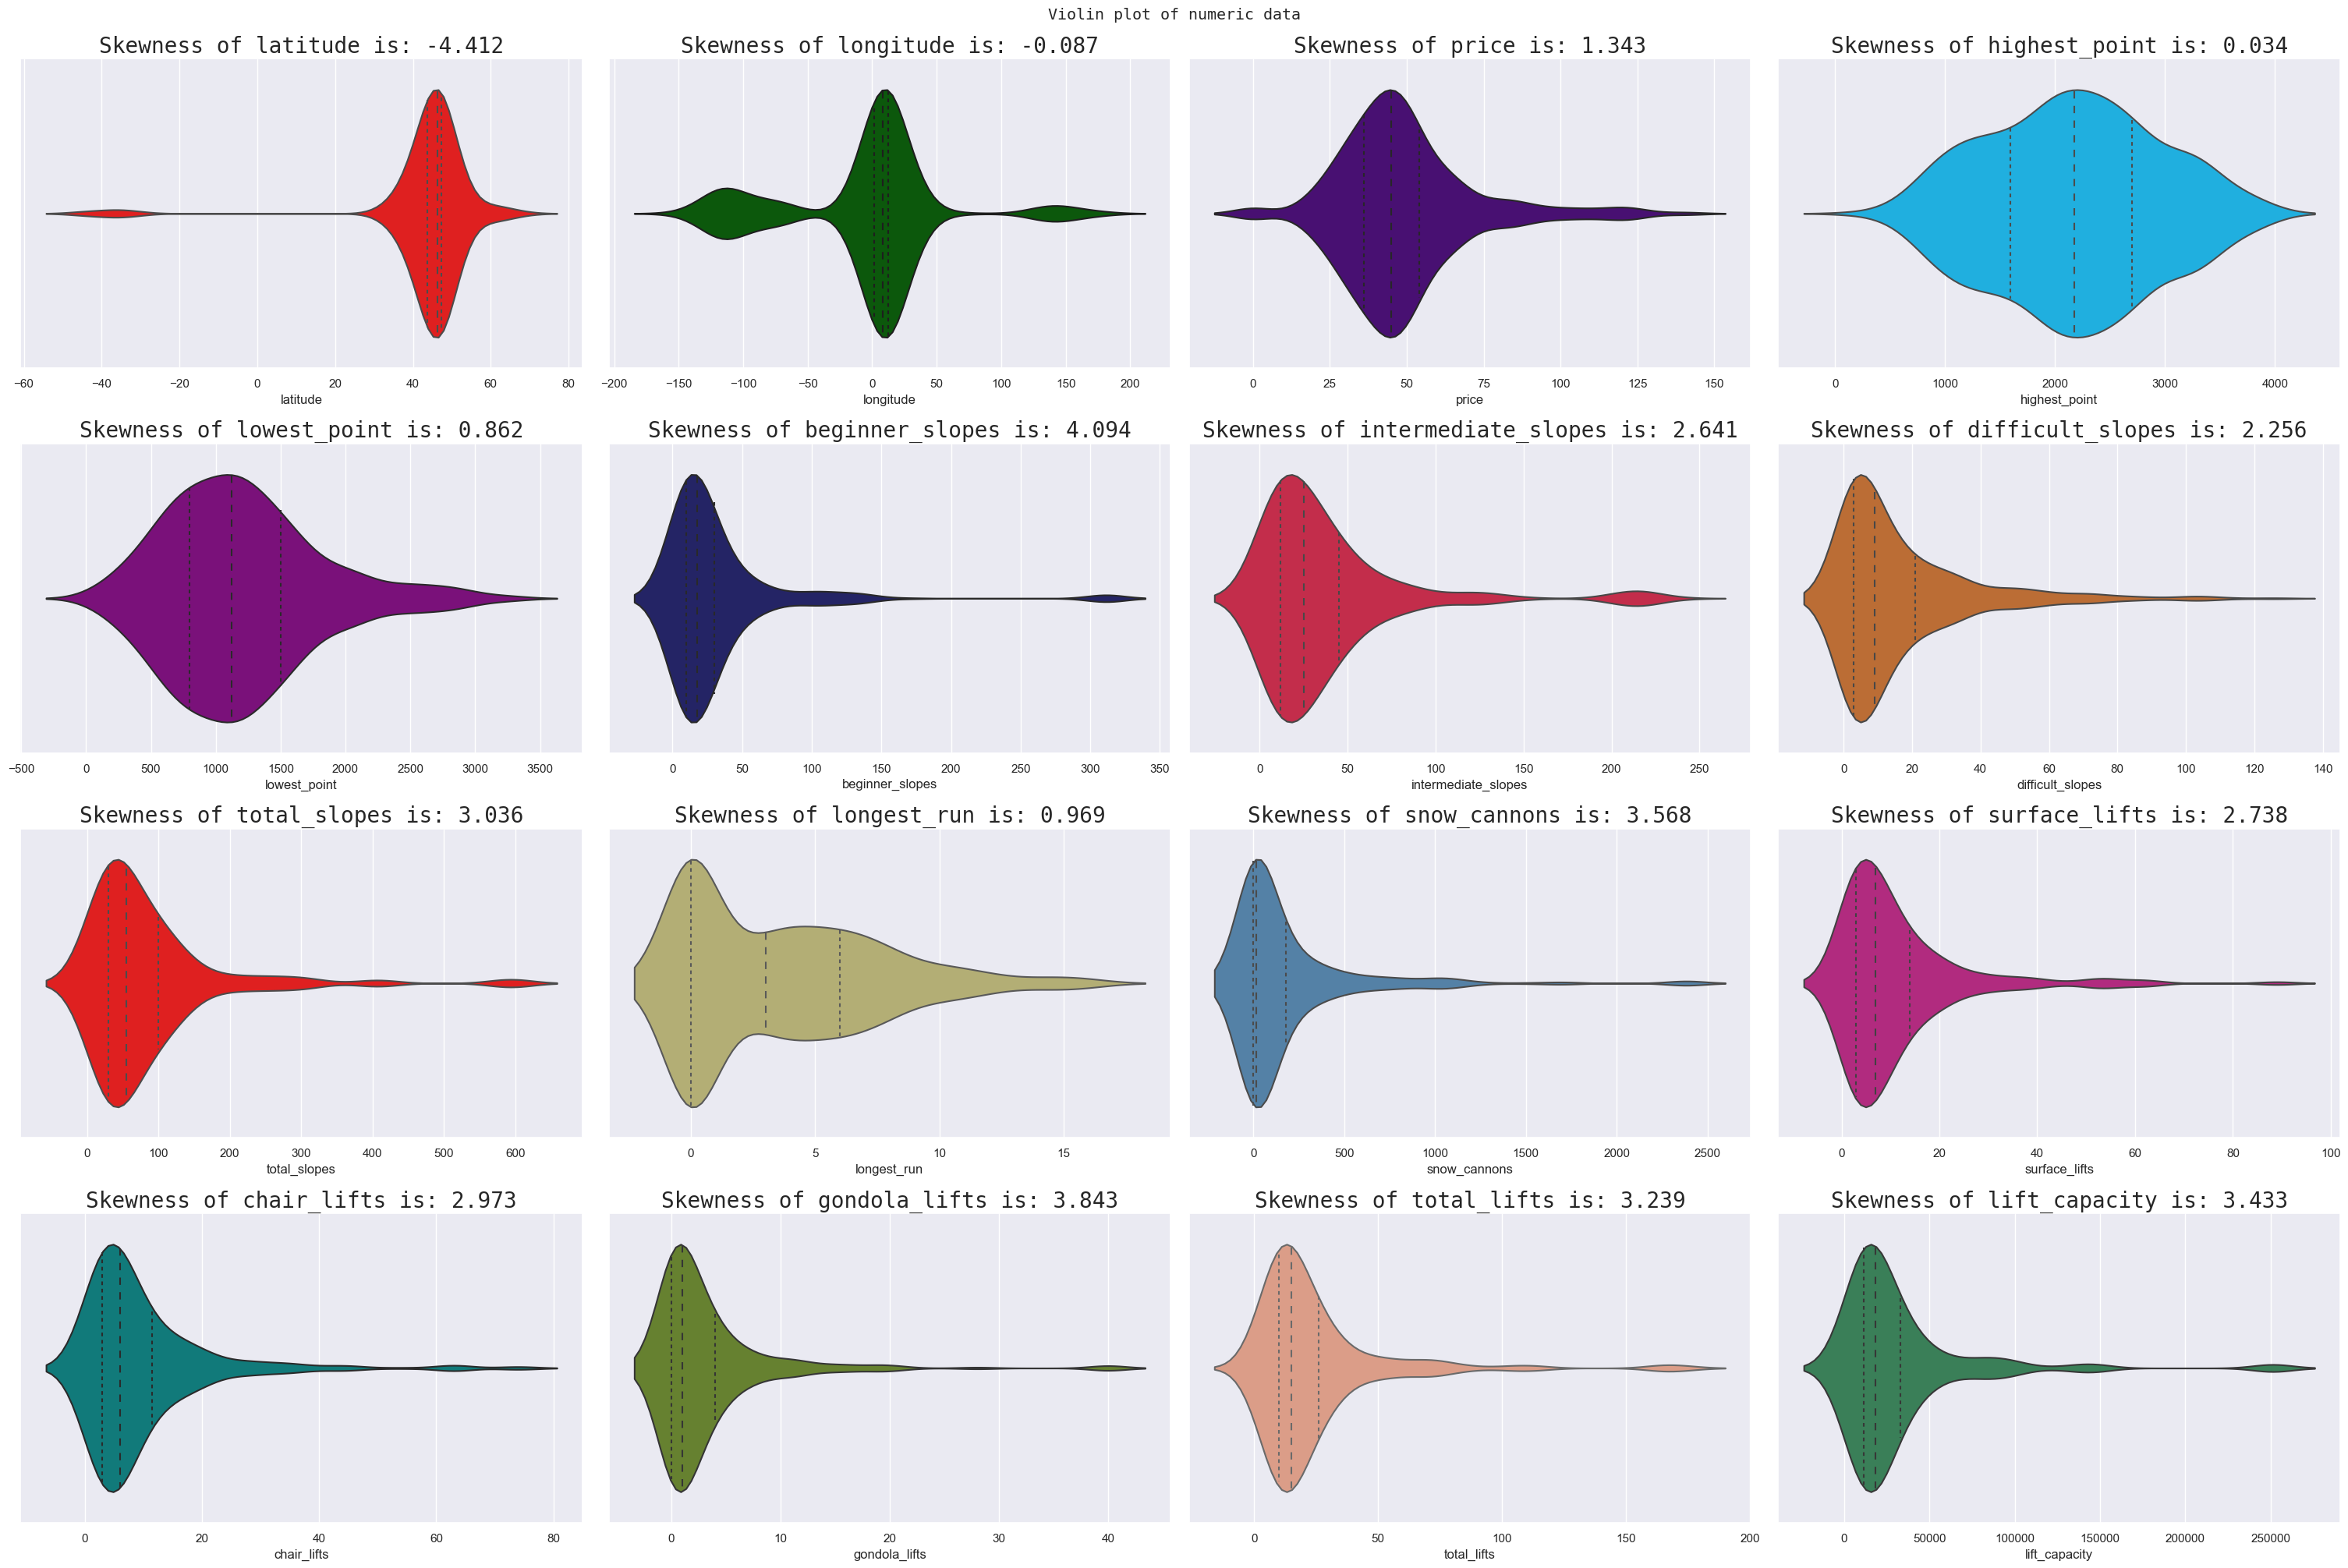

In [236]:
fig, ax = plt.subplots(4,4,figsize=(30,20),constrained_layout=True)
ax = ax.ravel()
colors_list = ['red','darkgreen',
                'indigo','deepskyblue',
                'darkmagenta','midnightblue',
                'crimson','chocolate','red',
                "darkkhaki","steelblue",'mediumvioletred',
                "darkcyan","olivedrab",'darksalmon','seagreen']

sns.set_theme(style='darkgrid')
for index,value in enumerate(nums):
        sns.violinplot(data=nums,x=value,color=colors_list[index],ax=ax[index],inner='quartile')
        ax[index].set_title(f'Skewness of {value} is: {np.around(nums[value].skew(axis=0),3)}',fontdict=fonts2)
        fig.suptitle("Violin plot of numeric data",fontdict=fonts1)      

**Observation**

*Histogram*
- There is a high concentration of prices between 20 - 60
- Both highest_point & lowest_point seems be guassian in nature; evenly distributed
- beginner_slopes, intermediate_slopes, difficult_slopes & total slopes are all positively skewed
- snow_cannons, surface_lifts, chair_lifts, gondola_lifts, total_lifts, lift_capacity are all heavily positivvely skewed.

*Boxen Plots*
-  Few price outliers from 120
- High variance can be seen in beginner_slopes,intermediate_slopes, total_slopes, total_lifts & lift_capacity


## **Exporting new data**

In [ ]:
# # CSV
# analysis_resorts.to_csv("my_data/analysis_resorts.csv",index=False)
# analysis_snow.to_csv("my_data/analysis_snow.csv",index=False)

In [284]:
# Excel
with pd.ExcelWriter('my_data/ski_resort_snow.xlsx') as writer:  
    analysis_resorts.to_excel(writer,index=False,sheet_name='resorts')
    analysis_snow.to_excel(writer,index=False,sheet_name='snow')